# Heart Disease Dataset Machine Learning Model Concepts
by Yağmur Aksoy


## 1- Loading the Data Set

In [8]:
!pip install -q ucimlrepo

In [10]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np

In [12]:
heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets

df = pd.DataFrame(X, columns=heart_disease.feature_names)
df['target'] = y

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [18]:
df.shape

(303, 14)

Our data set consists of 14 columns and 303 rows. A few missing data are detected in the ca and thal columns.

## 2- Examining the Data Set

**1. Age:**  
   The patient's age in years.

**2. Sex:**  
   The patient's gender.  
   - Value 1: Male  
   - Value 0: Female

**3. CP (chest pain type):**  
   The type of chest pain the patient experiences.  
   - Value 1: Typical angina  
   - Value 2: Atypical angina  
   - Value 3: Non-anginal pain  
   - Value 4: Asymptomatic

**4. trestbps (resting blood pressure):**  
   The patient's resting blood pressure (in mm Hg) upon hospital admission.

**5. chol (serum cholesterol):**  
   The patient's serum cholesterol level, expressed in mg/dl.

**6. fbs (fasting blood sugar):**  
   Indicates whether the patient's fasting blood sugar is above 120 mg/dl.  
   - Value 1: Yes  
   - Value 0: No

**7. restecg (resting electrocardiographic results):**  
   Results of the patient's resting electrocardiogram.  
   - Value 0: Normal  
   - Value 1: ST-T wave abnormality (T wave inversion and/or ST elevation or > 0.05 mV depression)  
   - Value 2: Possible or definite left ventricular hypertrophy based on Estes criteria

**8. thalach (maximum heart rate):**  
   The patient's maximum heart rate achieved during exercise.

**9. exang (exercise-induced angina):**  
   Indicates whether the patient experiences angina during exercise.  
   - Value 1: Yes  
   - Value 0: No

**10. oldpeak (ST depression induced by exercise relative to rest):**  
   The ST depression induced by exercise compared to the patient's resting state.

**11. slope (slope of the peak exercise ST segment):**  
   The slope of the peak exercise ST segment.  
   - Value 1: Upsloping  
   - Value 2: Flat  
   - Value 3: Downsloping

**12. ca (number of major vessels colored by fluoroscopy):**  
   The number of major vessels colored by fluoroscopy, ranging from 0 to 3.

**13. thal (thalassemia condition):**  
   The patient's thalassemia condition.  
   - Value 3: Normal  
   - Value 6: Fixed defect  
   - Value 7: Reversible defect

**14. target (target variable):**  
   The variable indicating the presence of heart disease, where  
   - Value 0: No heart disease  
   - Value 1: Heart disease


In [23]:
unique_values = df['target'].unique()
print(f"\nUnique values of the 'target' column and their counts:")
for value in unique_values:
    count = df['target'].value_counts()[value]
    print(f" - {value}: {count} times")


Unique values of the 'target' column and their counts:
 - 0: 164 times
 - 2: 36 times
 - 1: 55 times
 - 3: 35 times
 - 4: 13 times


### Target Column in Our Dataset:

- **0:** Patients without signs of heart disease  
- **1, 2, 3, 4:** Different levels of heart disease, labeled with different numbers.

The goal of our model will be to determine whether heart disease is present or not. Therefore, we will treat the value **0** as an indicator of the absence of the disease, while the values **1, 2, 3, and 4** will indicate the presence of heart disease. These four values represent different levels of the disease. 

As a result, our model will predict whether heart disease is present (0 or 1).


In [27]:
df['target'] = df['target'].apply(lambda x: 0 if x == 0 else 1)

In [29]:
df['target'].value_counts()

target
0    164
1    139
Name: count, dtype: int64


## 3- Filling in Missing Values


#### 3.1 - ca (number of major vessels stained by fluoroscopy)

In [33]:
correlation_matrix = df.corr()
thal_correlation = correlation_matrix['ca'].abs().sort_values(ascending=False)

print("Top 3 features most correlated with 'ca':")
print(thal_correlation[1:4])

Top 3 features most correlated with 'ca':
target     0.460442
age        0.362605
oldpeak    0.295832
Name: ca, dtype: float64


In [35]:
df['ca'] = df.groupby(['target', 'age', 'oldpeak'])['ca'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

print(df['ca'].isnull().sum())

3


In [37]:
df['ca'] = df.groupby(['age', 'target'])['ca'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

missing_values_after = df['ca'].isna().sum()
print(f"Number of missing values in the 'ca' column (after filling): {missing_values_after}")

Number of missing values in the 'ca' column (after filling): 1


In [39]:
df['ca'] = df.groupby(['oldpeak', 'target'])['ca'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

missing_values_after = df['ca'].isna().sum()
print(f"Number of missing values in 'ca' column (after filling): {missing_values_after}")

Number of missing values in 'ca' column (after filling): 0


In [41]:
unique_thal_values = df['ca'].unique()
print(f"Unique values in the 'ca' column: {unique_thal_values}")

Unique values in the 'ca' column: [0. 3. 2. 1.]



#### 3.2 - thal (thalassemia condition):

In [44]:
correlation_matrix = df.corr()
thal_correlation = correlation_matrix['thal'].abs().sort_values(ascending=False)

print("Top 3 features most correlated with 'thal':")
print(thal_correlation[1:4])

Top 3 features most correlated with 'thal':
target     0.525689
sex        0.380936
oldpeak    0.341004
Name: thal, dtype: float64


In [46]:
df['thal'] = df.groupby(['sex', 'target', 'oldpeak'])['thal'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

missing_values_after = df['thal'].isna().sum()
print(f"Number of missing values in the 'thal' column (after filling): {missing_values_after}")

Number of missing values in the 'thal' column (after filling): 0


In [48]:
unique_thal_values = df['thal'].unique()
print(f"Unique values in the 'thal' column: {unique_thal_values}")

Unique values in the 'thal' column: [6. 3. 7.]


## 4- EDA (Exploratory Data Analysis) Study on Heart Disease Data Sett

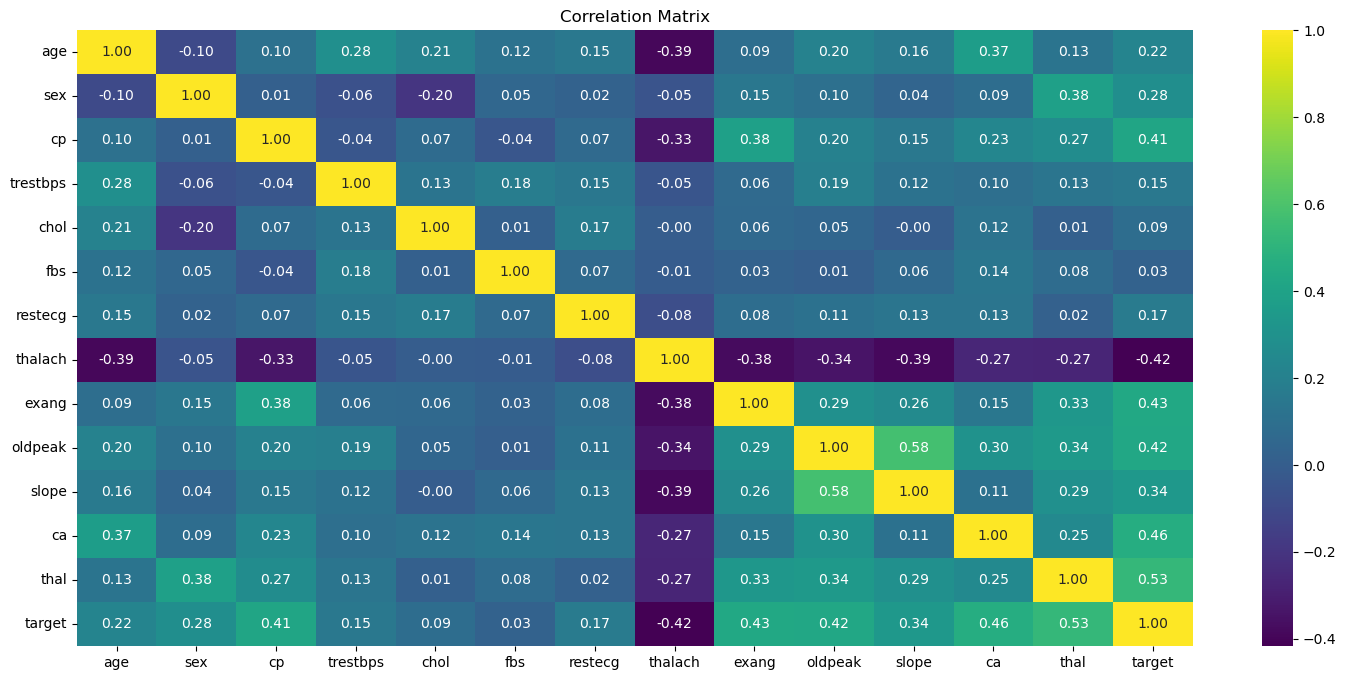

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### 4.1- The Role of Age and Gender Factors on the Risk of Heart Disease


Since there are so many different values ​​from age category, let's first create a categorical age variable.

In [58]:
def categorize_age(age):
    if age < 45:
        return 'Young Age for Heart Disease'
    elif 45 <= age <= 60:
        return 'Normal Age for Heart Disease'
    elif 60 <= age <= 75:
        return 'Risky Age for Heart Disease'
    else:
        return 'High-Risk Age for Heart Disease'

df['AgeCategory'] = df['age'].apply(categorize_age)

In [60]:
print(df[['age', 'AgeCategory','target']].head())

   age                  AgeCategory  target
0   63  Risky Age for Heart Disease       0
1   67  Risky Age for Heart Disease       1
2   67  Risky Age for Heart Disease       1
3   37  Young Age for Heart Disease       0
4   41  Young Age for Heart Disease       0


In [62]:
age_category_counts = df['AgeCategory'].value_counts()
print(age_category_counts)

AgeCategory
Normal Age for Heart Disease       169
Risky Age for Heart Disease         77
Young Age for Heart Disease         55
High-Risk Age for Heart Disease      2
Name: count, dtype: int64


In [68]:
df['AgeCategory'] = df['age'].apply(categorize_age)

age_mapping = {
    'Young Age for Heart Disease': 1,
    'Normal Age for Heart Disease': 2,
    'Risky Age for Heart Disease': 3,
    'High-Risk Age for Heart Disease': 4
}

df['age_numeric'] = df['AgeCategory'].map(age_mapping)

df[['age', 'AgeCategory', 'age_numeric']].head()

,age,AgeCategory,age_numeric
0,63,Risky Age for Heart Disease,3
1,67,Risky Age for Heart Disease,3
2,67,Risky Age for Heart Disease,3
3,37,Young Age for Heart Disease,1
4,41,Young Age for Heart Disease,1


In [70]:
sex_counts = df['sex'].value_counts()
print(sex_counts)

sex
1    206
0     97
Name: count, dtype: int64


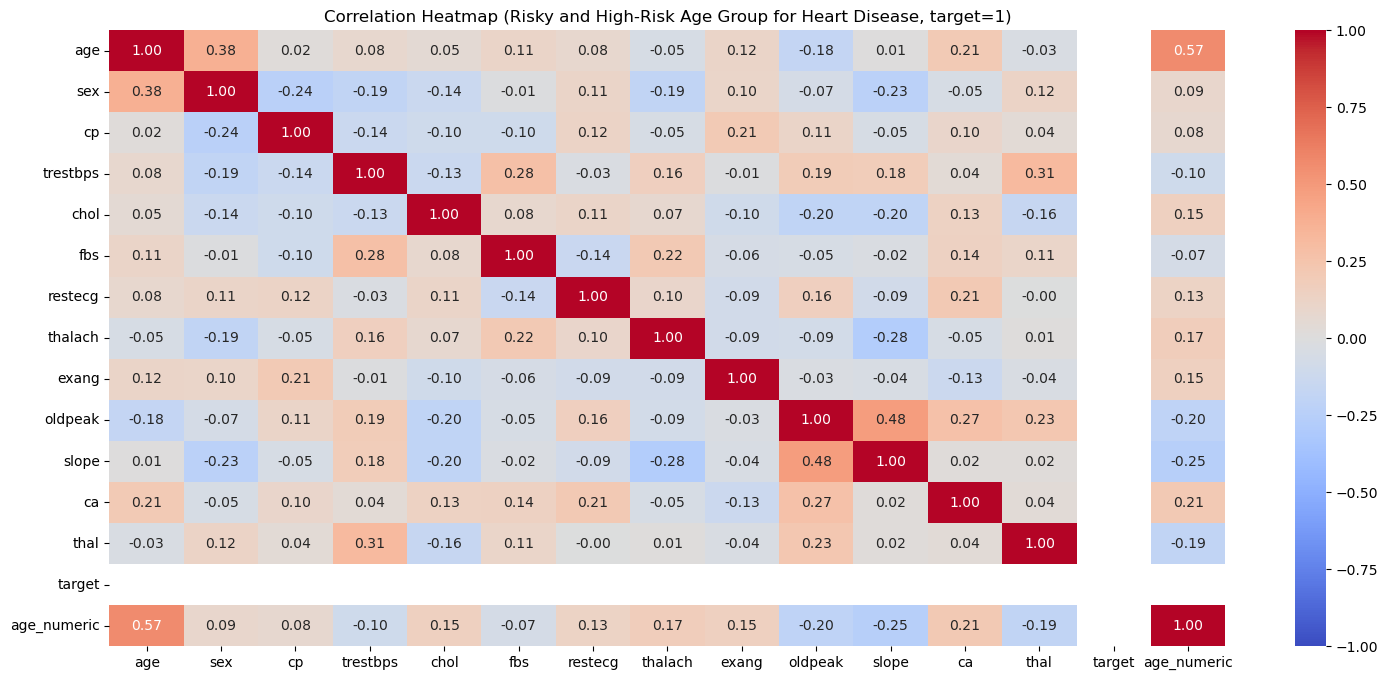

In [72]:
senior_elderly_with_disease = df[(df['age_numeric'].isin([3, 4])) & (df['target'] == 1)]
numeric_columns = senior_elderly_with_disease.select_dtypes(include=['number'])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(18, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Risky and High-Risk Age Group for Heart Disease, target=1)')
plt.show()

In [74]:
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs != 1]
unique_corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) < corr_pairs.index.get_level_values(1)]

top_10_corrs = unique_corr_pairs.sort_values(ascending=False).head(10)

In [76]:
print("Top 10 Correlations:")
top_10_corrs

Top 10 Correlations:


age          age_numeric    0.568194
oldpeak      slope          0.484156
age          sex            0.378164
thal         trestbps       0.314678
fbs          trestbps       0.279114
ca           oldpeak        0.268179
oldpeak      thal           0.229612
fbs          thalach        0.218038
ca           restecg        0.214678
age_numeric  ca             0.212470
dtype: float64

#### 4.1.1- Exercise ST Segment Slope and ST Depression Compared to Rest:

**Up-sloping**: The upward slope of the ST segment is generally a healthy heart response and indicates that the arteries are open.

**Flat**: A flat ST segment may indicate that the heart is responding differently during exercise and can signal cardiovascular issues.

**Down-sloping**: A downward slope of the ST segment suggests that the heart is not receiving enough oxygen and may indicate potential coronary artery disease, which is usually a concerning finding.

**Exercise ST Depression**: A downward shift in the ST segment during exercise indicates that the heart may be experiencing oxygen deficiency and could be at risk for coronary artery disease.

**The slope of the T segment and the ST depression obtained during exercise are important for assessing the heart's performance and oxygen intake during exercise. These findings can provide information about coronary artery disease or other cardiovascular problems and may guide appropriate medical intervention or treatment panning.**


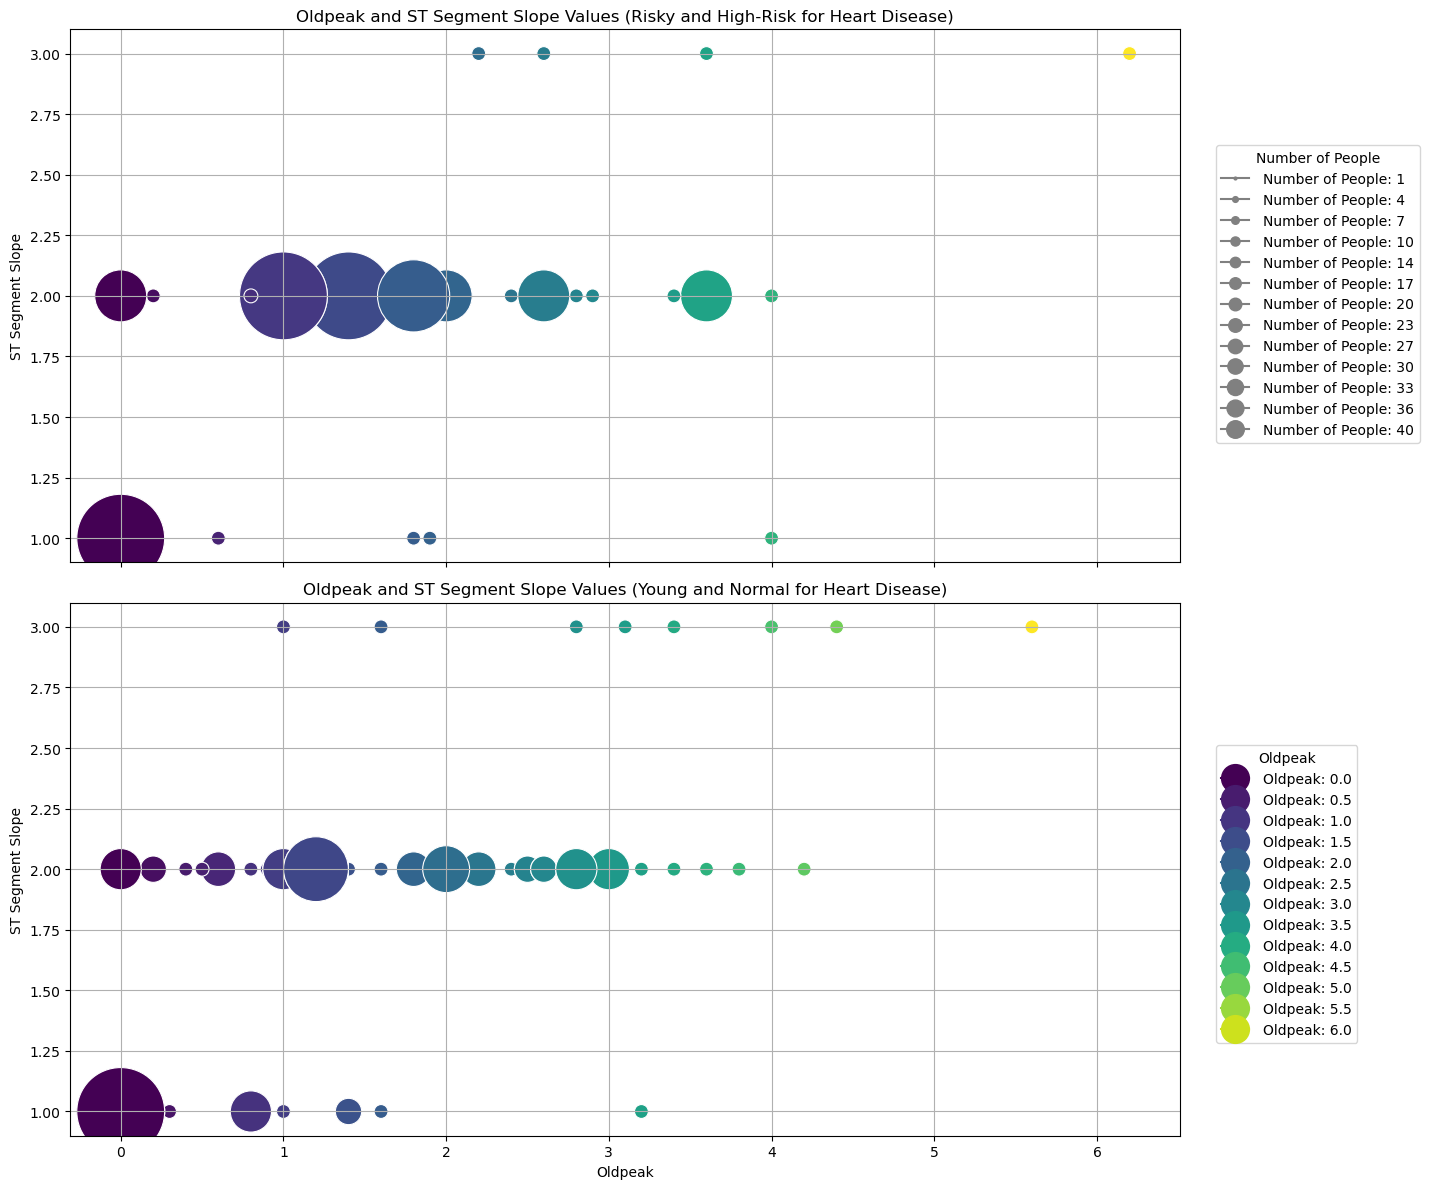

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.lines import Line2D

# Data filtering
senior_elderly_with_disease = df[(df['age_numeric'].isin([3, 4])) & (df['target'] == 1)].copy()
young_middle_aged_with_disease = df[(df['age_numeric'].isin([1, 2])) & (df['target'] == 1)].copy()

# Count calculation
senior_elderly_with_disease['count'] = senior_elderly_with_disease.groupby(['slope', 'oldpeak'])['oldpeak'].transform('count')
young_middle_aged_with_disease['count'] = young_middle_aged_with_disease.groupby(['slope', 'oldpeak'])['oldpeak'].transform('count')

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Scatter plot for seniors
scatter1 = sns.scatterplot(
    y='slope', 
    x='oldpeak', 
    size='count',  
    hue='oldpeak', 
    data=senior_elderly_with_disease, 
    sizes=(100, 4000), 
    palette='viridis', 
    ax=axes[0],
    legend=False
)
axes[0].set_title('Oldpeak and ST Segment Slope Values (Risky and High-Risk for Heart Disease)')
axes[0].set_ylabel('ST Segment Slope')
axes[0].grid(True)

# Scatter plot for young/middle-aged
scatter2 = sns.scatterplot(
    y='slope', 
    x='oldpeak', 
    size='count',  
    hue='oldpeak',  
    data=young_middle_aged_with_disease, 
    sizes=(100, 4000), 
    palette='viridis', 
    ax=axes[1],
    legend=False
)
axes[1].set_title('Oldpeak and ST Segment Slope Values (Young and Normal for Heart Disease)')
axes[1].set_ylabel('ST Segment Slope')
axes[1].set_xlabel('Oldpeak')
axes[1].grid(True)

# Custom legends
legend_labels = np.arange(0, 6.5, 0.5) 
legend_sizes = np.linspace(100, 4000, len(legend_labels))
size_handles = [Line2D([0], [0], marker='o', color='gray', markersize=np.sqrt(size)/10, label=f'Number of People: {int(size/100)}')
                for size in legend_sizes]

cmap = plt.get_cmap('viridis')
color_handles = [Line2D([0], [0], marker='o', color=cmap(label/6.5), markersize=10, label=f'Oldpeak: {round(label, 1)}')
                 for label in legend_labels]

# Add legends to the figure
fig.legend(handles=size_handles, title='Number of People', bbox_to_anchor=(1, 0.75), loc='center left', borderaxespad=1.5, handletextpad=1, markerscale=2.0)
fig.legend(handles=color_handles, title='Oldpeak', bbox_to_anchor=(1, 0.25), loc='center left', borderaxespad=1.5, handletextpad=1, markerscale=2.0)

plt.tight_layout()
plt.show()


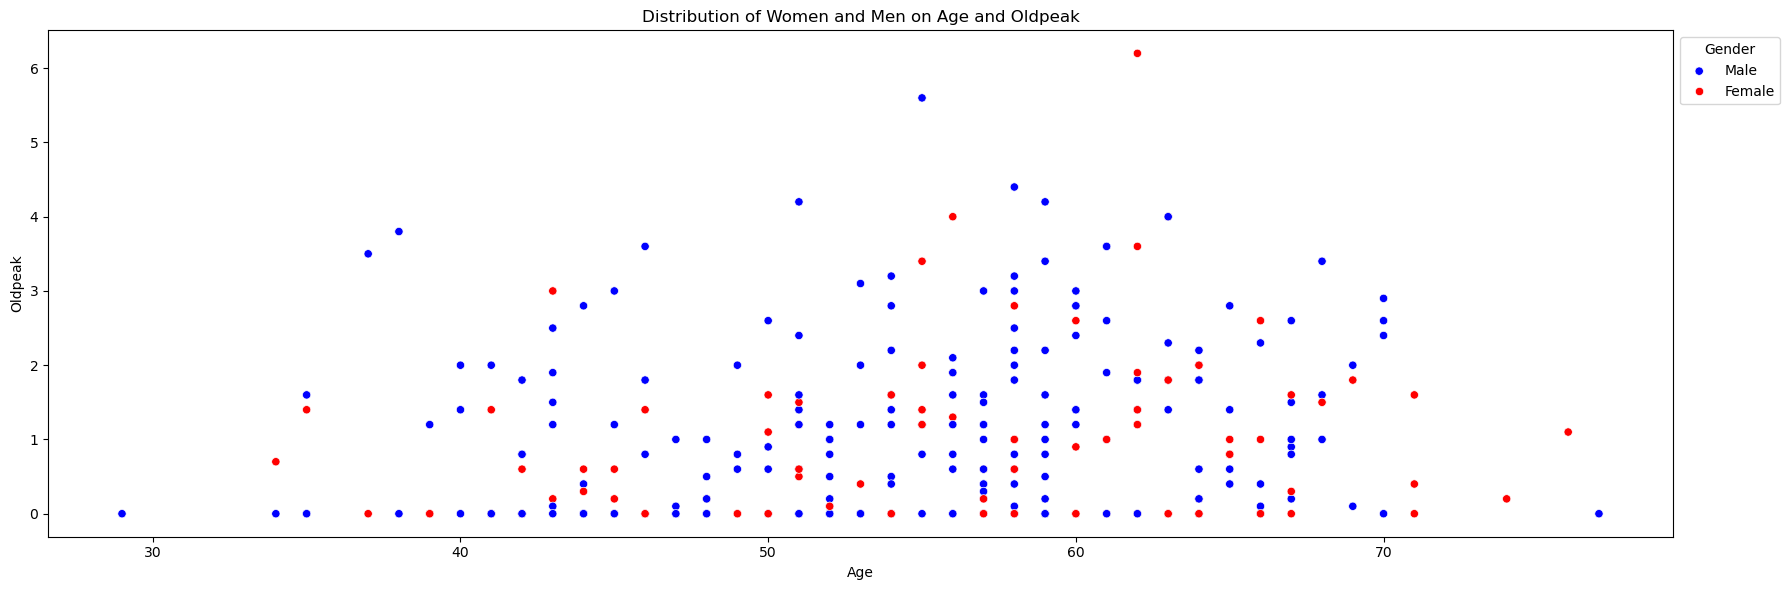

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(figsize=(18, 6))

sns.scatterplot(
    x='age', 
    y='oldpeak', 
    hue='sex', 
    data=df, 
    palette={0: 'red', 1: 'blue'},
    sizes=(100, 4000),
    legend='brief'
).set_title('Distribution of Women and Men on Age and Oldpeak')

plt.xlabel('Age')
plt.ylabel('Oldpeak')
plt.legend(title='Gender', bbox_to_anchor=(1, 1), loc='upper left', labels=['Male', 'Female'])
plt.tight_layout()

plt.show()

***There are significant differences in oldpeak and ST segment slope values ​​between the Young and Middle age group and the Old and Very Old group. This shows that the age category may give different results in relation to these two variables. At the same time, a change in the numbers and distributions of oldpeak is observed on the basis of gender***

#### 4.1.2- cp(Type of Chest Pain) and exang(Type of Chest Pain):

## Relationship Between "cp" (Chest Pain Type) and "exang" (Exercise Induced Angina)

These two terms provide important data regarding heart health:

### cp (Chest Pain Tipi)

This indicates the type of chest pain a person experiences. It is generally categorized into four types:

- **Type 1 (Typical Angina)**: Classic chest pain triggered by exercise.
- **Type 2 (Atypical Angina)**: Chest pain that does not fit typical characteristics.
- **Type 3 (Non-Anginal Pain)**: Chest pain that may have other non-heart-related causes.
- **Type 4 (Asymptomatic)**: No symptoms.

### exang (Exercise Iklenen Angina)

This indicates whether chest pain occurs during exercise:

- **0**: No angina during exercise.
- **1**: Angina present during exercise.

### Relationship:

***Typically, individuals experiencing typical angina (cp = 1) are more likely to report exercise-induced angina (exang = 1), as exercise increases the heart's oxygen demand, which may lead to angina due to existing blockages. Conversely, those with atypical or non-anginal pain (cp = 2, 3) may not experience angina during exercise (exang = 0). Examining this relationship indicates that individuals who experience chest pain during exercise are at a hgher cardiac risk.***


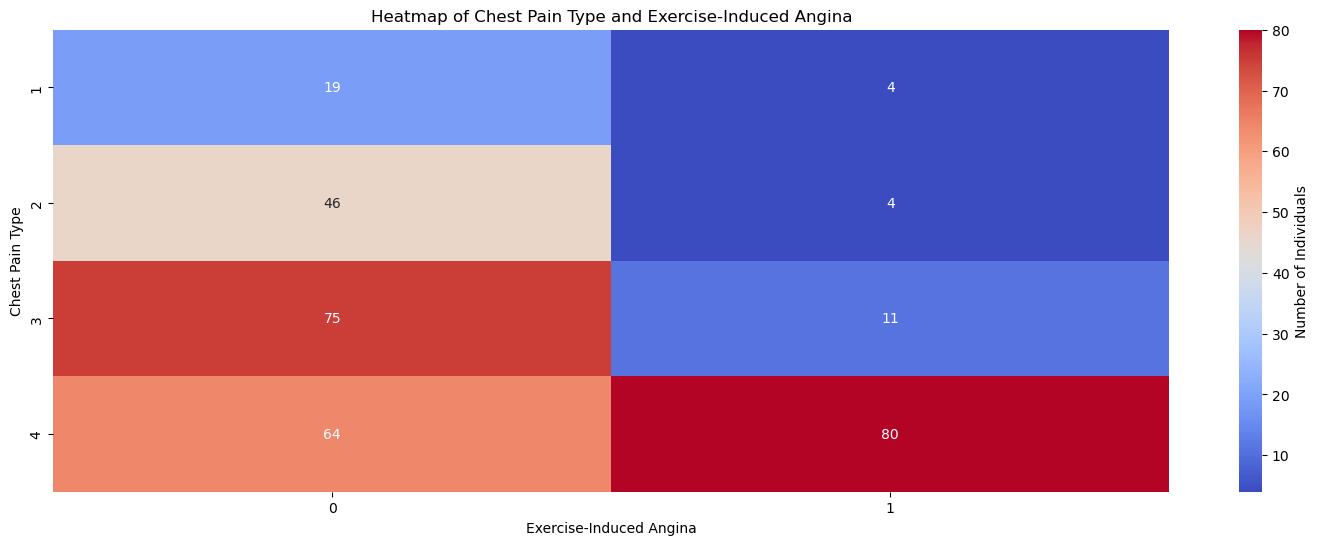

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = df.pivot_table(index='cp', columns='exang', values='age_numeric', aggfunc='count', fill_value=0)

plt.figure(figsize=(18, 6))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm', cbar_kws={'label': 'Number of Individuals'})
plt.title('Heatmap of Chest Pain Type and Exercise-Induced Angina')
plt.xlabel('Exercise-Induced Angina')
plt.ylabel('Chest Pain Type')
plt.show()

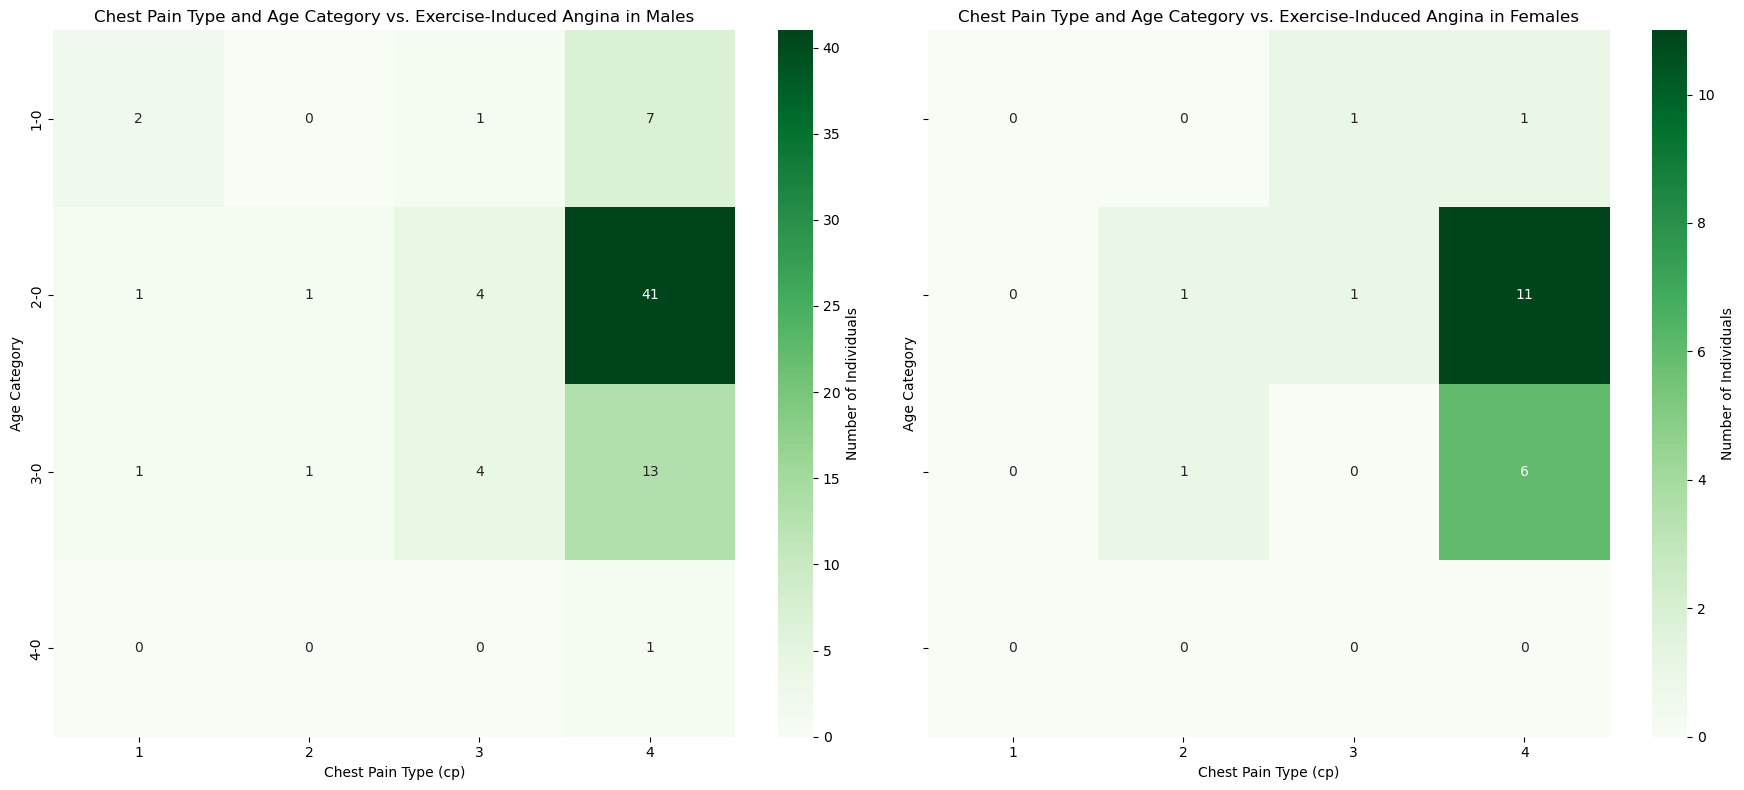

In [93]:
heatmap_data = df.pivot_table(
    index=['age_numeric', 'sex'], 
    columns='cp', 
    values='exang', 
    aggfunc=lambda x: x.value_counts().get(1, 0), 
    fill_value=0,
    observed=True 
)

male_data = heatmap_data.loc[(slice(None), 1), :]
female_data = heatmap_data.loc[(slice(None), 0), :]

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

sns.heatmap(
    male_data,
    annot=True,
    fmt='.0f', 
    cmap='Greens',
    cbar_kws={'label': 'Number of Individuals'},
    ax=axes[0]
)
axes[0].set_title('Chest Pain Type and Age Category vs. Exercise-Induced Angina in Males')
axes[0].set_xlabel('Chest Pain Type (cp)')
axes[0].set_ylabel('Age Category')

sns.heatmap(
    female_data,
    annot=True,
    fmt='.0f',
    cmap='Greens',
    cbar_kws={'label': 'Number of Individuals'},
    ax=axes[1]
)
axes[1].set_title('Chest Pain Type and Age Category vs. Exercise-Induced Angina in Females')
axes[1].set_xlabel('Chest Pain Type (cp)')
axes[1].set_ylabel('Age Category')

plt.tight_layout()
plt.show()

***Type 4 Chest pain and angiography seem to be directly proportional, the other 3 types of chest pain do not seem to be related to angia. This situation seems to be valid for both genders.***


#### 4.1.3- Relationship between ca (Number of Vessels) and oldpeak (ST Segment Depression):

This description refers to a measurement system that provides important data about heart vascular health. Here's a more detailed summary of each condition:

- **0**: No major artery disease or normal. In this case, the heart vessels are healthy, and there is no narrowing or blockage.
- **1**: Narrowing or blockage in one major artery. This condition poses a risk to heart health and may require further monitoring or intervention.
- **2**: Narrowing or blockage in two major arteries. This indicates an increased risk of heart disease and may necessitate medical intervention.
- **3**: Narrowing or blockage in three major arteries. This is the most serious condition and typically requires urgent medical intervention, such as angioplasty or bypass surgery.

This classification serves as an important tool for assessing cardiovascular health and helps in determining treatment plans for paients.


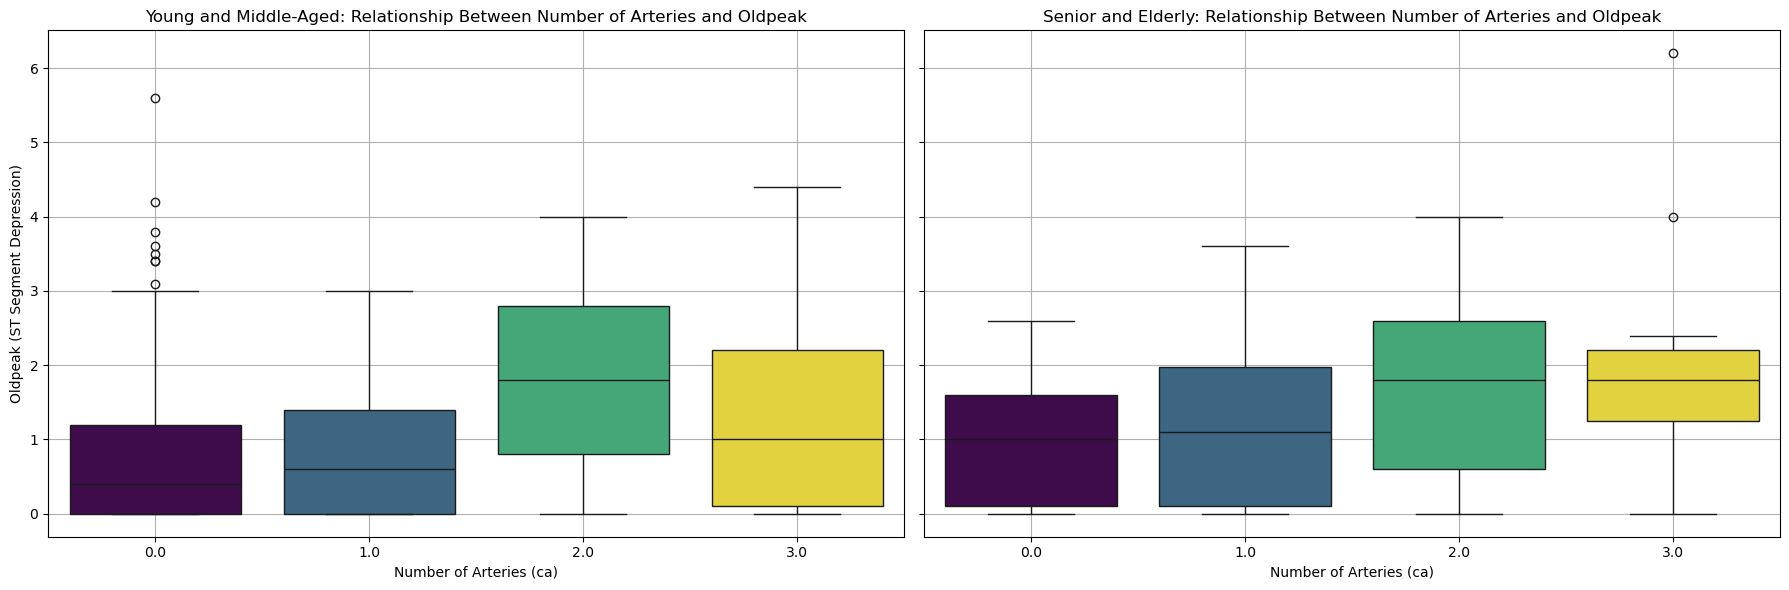

In [98]:
young_middle_aged = df[df['age_numeric'].isin([1, 2])]
senior_elderly = df[df['age_numeric'].isin([3, 4])]

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

sns.boxplot(data=young_middle_aged, x='ca', y='oldpeak', hue='ca', ax=axes[0], palette='viridis', legend=False)
axes[0].set_title('Young and Middle-Aged: Relationship Between Number of Arteries and Oldpeak')
axes[0].set_xlabel('Number of Arteries (ca)')
axes[0].set_ylabel('Oldpeak (ST Segment Depression)')
axes[0].grid(True)

sns.boxplot(data=senior_elderly, x='ca', y='oldpeak', hue='ca', ax=axes[1], palette='viridis', legend=False)
axes[1].set_title('Senior and Elderly: Relationship Between Number of Arteries and Oldpeak')
axes[1].set_xlabel('Number of Arteries (ca)')
axes[1].set_ylabel('Oldpeak (ST Segment Depression)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

It is seen that the Oldpeak value increases as the age category increases. At the same time, it has been observed that as the oldpeak level increases, the number of clogged vessels also increases. Although there are some outliers, these outliers do not appear to have a significant impact on the overall results.


#### 4.1.4 -relationship between cp (chest pain) and thal (thalassemia condition):

##### Thalassemia Status (thal)

This variable indicates possible structural or functional abnormalities in a patient's heart muscle. Thalassemia status is classified into three different values:

- **Value 3 (Normal)**: There are no abnormalities related to thalassemia in the patient. The heart muscle functions normally.
- **Value 6 (Fixed Defect)**: There is a continuous dysfunction or damage in the heart muscle. This condition is permanent and represents an irreversible defect.
- **Value 7 (Reversible Defect)**: There is a temporary dysfunction in the heart muscle. This defect can heal and return to normal with treament.


<Figure size 1800x600 with 0 Axes>

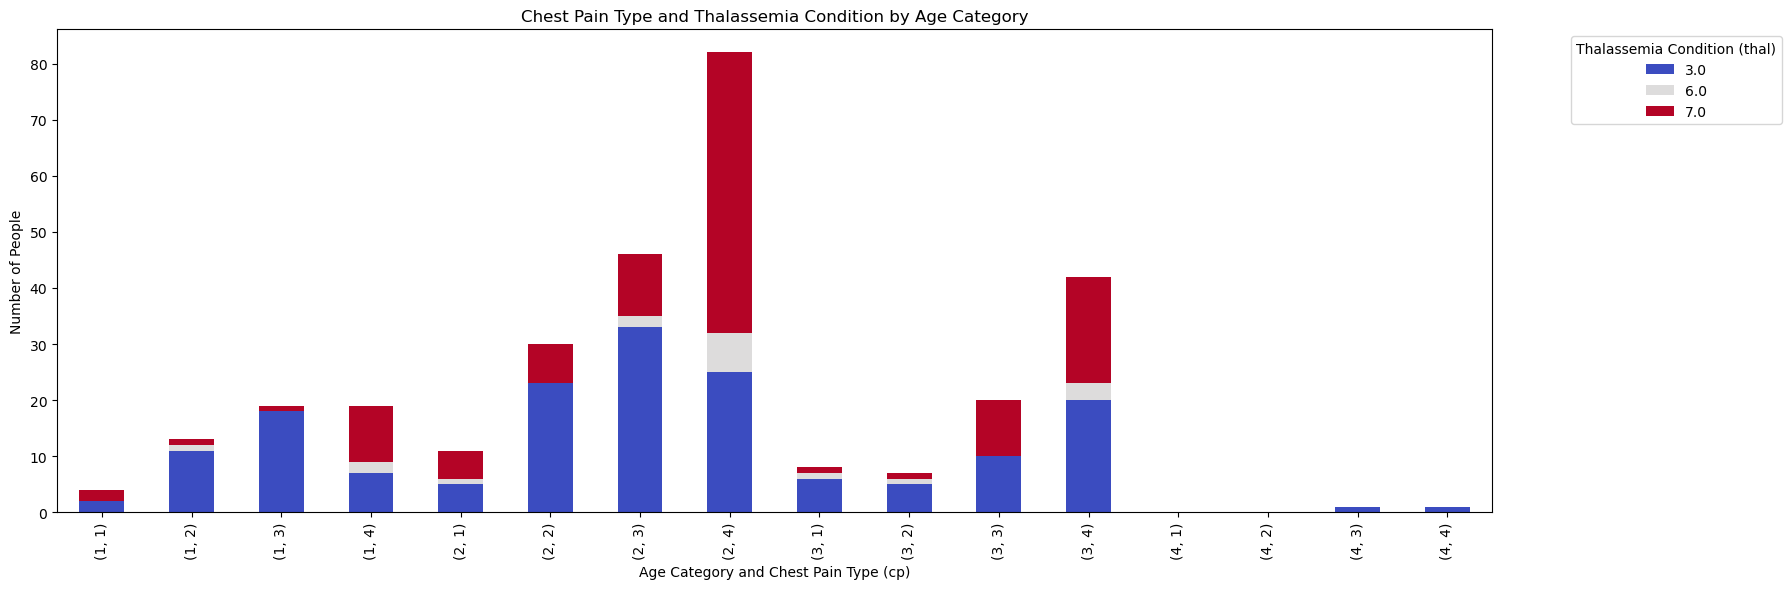

In [106]:
age_order = [1, 2, 3, 4]
df['age_numeric'] = pd.Categorical(df['age_numeric'], categories=age_order, ordered=True)

stacked_data = df.groupby(['age_numeric', 'cp', 'thal'], observed=False).size().unstack(fill_value=0)

plt.figure(figsize=(18, 6))

stacked_data.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(18, 6))

plt.title('Chest Pain Type and Thalassemia Condition by Age Category')
plt.xlabel('Age Category and Chest Pain Type (cp)')
plt.ylabel('Number of People')
plt.legend(title='Thalassemia Condition (thal)', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

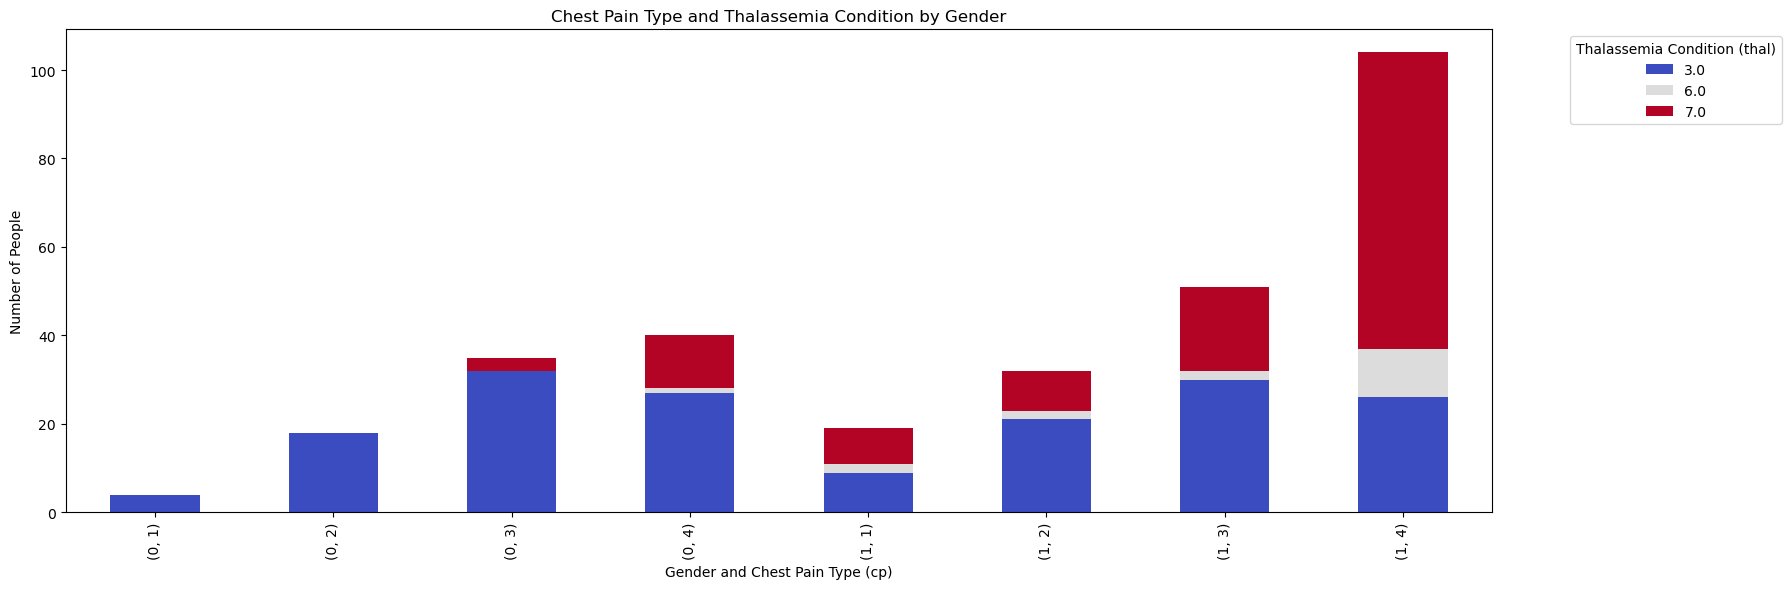

In [108]:
stacked_data = df.groupby(['sex', 'cp', 'thal'], observed=False).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))

stacked_data.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(18, 6))

plt.title('Chest Pain Type and Thalassemia Condition by Gender')
plt.xlabel('Gender and Chest Pain Type (cp)')
plt.ylabel('Number of People')
plt.legend(title='Thalassemia Condition (thal)', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

***The relationship between thalassemia status and chest pain type becomes stronger as age increases. Women are less likely to have previously detected thalassemia than male patients.***

#### 4.1.5 -relationship between oldpeak and thal (thalassemia condition):

- Oldpeak (ST Segment Depression): It is a value that measures the amount of depression in the ST segment and shows how effective oxygenation by the heart muscle is. It is often used in exercise tests and plays an important role in diagnosing heart diseases.

- Thal (Thalassemia Status): It refers to the patient's thalassemia status. This variable is used to evaluate possible disorders and abnormalities in heart muscle function. Thalassemia status can affect the presence and type of heart disease.

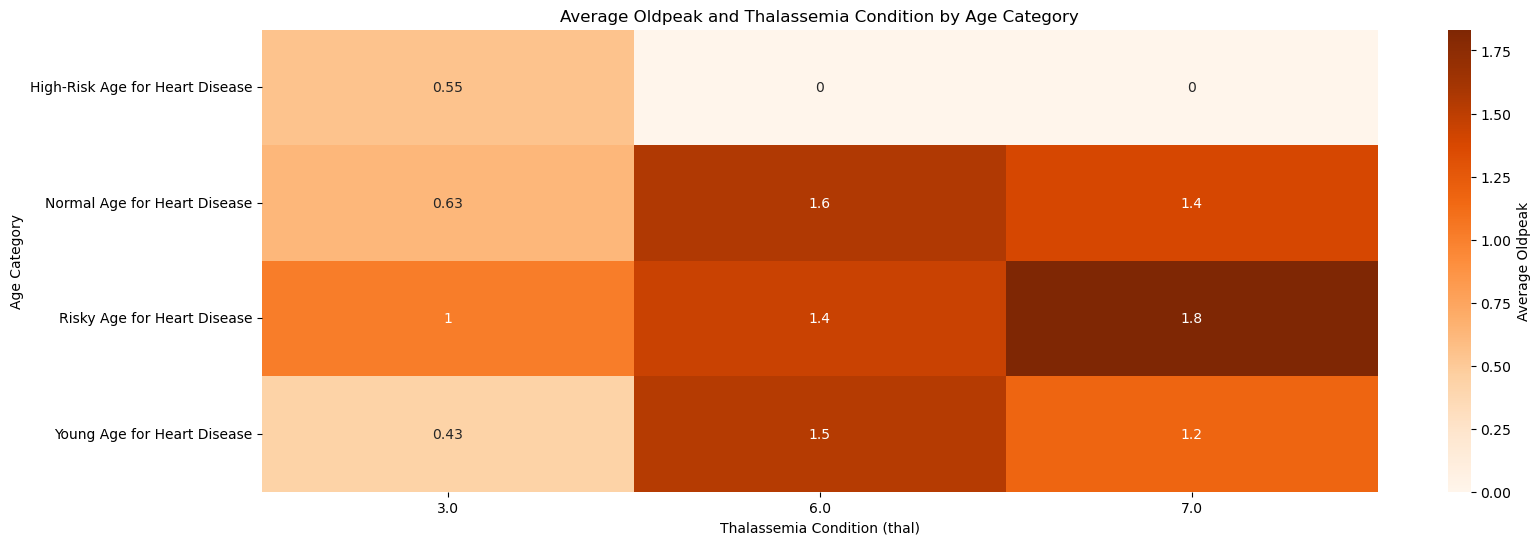

In [113]:
heatmap_data = df.pivot_table(index='AgeCategory', columns='thal', values='oldpeak', aggfunc='mean', fill_value=0, observed=False)

plt.figure(figsize=(18, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Oranges', cbar_kws={'label': 'Average Oldpeak'})
plt.title('Average Oldpeak and Thalassemia Condition by Age Category')
plt.xlabel('Thalassemia Condition (thal)')
plt.ylabel('Age Category')
plt.show()

Significant changes are observed in average oldpeak levels depending on thalassemia status. These changes may reflect the effects of different types of thalassemia on the heart. For example, there may be differences between Thalassemia Status 3 (Normal), Thalassemia Status 6 (Fixed Defect) and Thalassemia Status 7 (Reversible Defect), which may cause changes in people's ST segment depression (oldpeak) values.

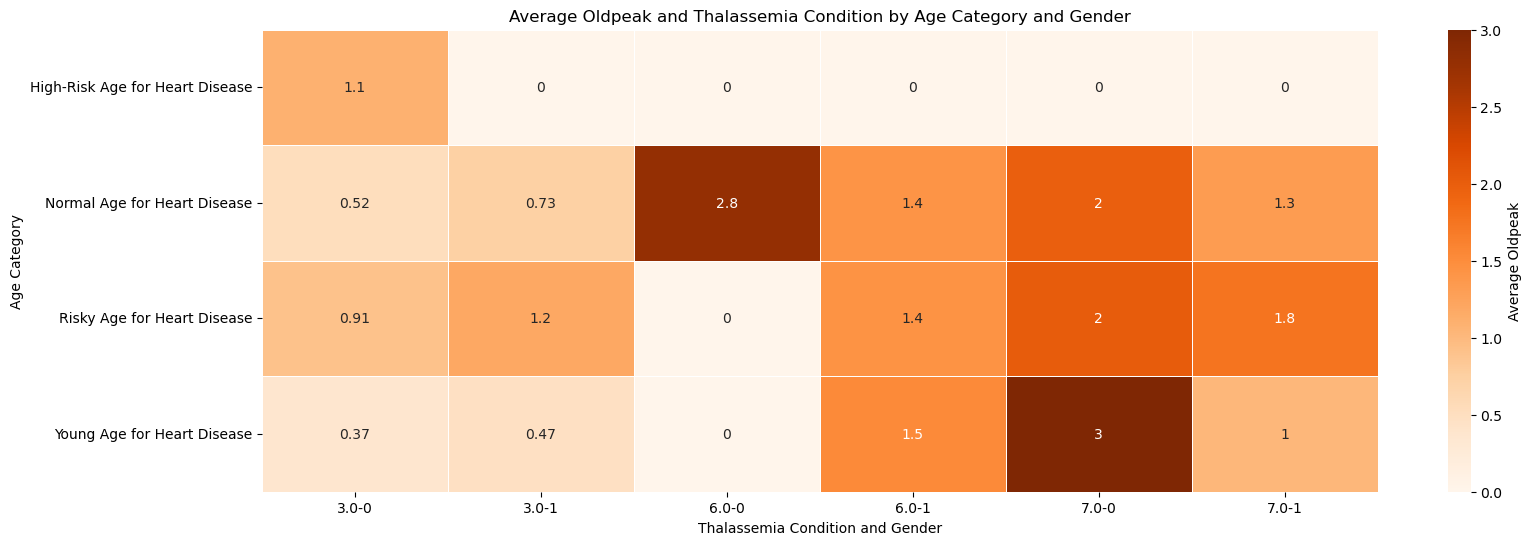

In [116]:
heatmap_data = df.pivot_table(index='AgeCategory', columns=['thal', 'sex'], values='oldpeak', aggfunc='mean', fill_value=0, observed=False)

plt.figure(figsize=(18, 6))

sns.heatmap(heatmap_data, annot=True, cmap='Oranges', cbar_kws={'label': 'Average Oldpeak'}, linewidths=0.5)
plt.title('Average Oldpeak and Thalassemia Condition by Age Category and Gender')
plt.xlabel('Thalassemia Condition and Gender')
plt.ylabel('Age Category')
plt.show()


Observed differences between gender and thalassemia status may be helpful in understanding how oldpeak values ​​vary in different age groups. The higher mean oldpeak value in women and middle-aged individuals may indicate a more pronounced ST segment depression in women in this age group. The average oldpeak value is observed to be lower in men in the same age group. This suggests that oldpeak levels are generally higher in female patients and that gender has a significant impact on this measurement.


#### ***The incidence of oldpeak is higher in female patients with thalassemia.***


#### 4.1.6 -Relationship between fbs (fasting blood sugar) and trestbps (resting blood pressure):

In [123]:
unique_trestbps = df['trestbps'].nunique()
print("Number of unique values in the trestbps column:", unique_trestbps)

print("Unique values in the trestbps column:", df['trestbps'].unique())

Number of unique values in the trestbps column: 50
Unique values in the trestbps column: [145 160 120 130 140 172 150 110 132 117 135 112 105 124 125 142 128 170
 155 104 180 138 108 134 122 115 118 100 200  94 165 102 152 101 126 174
 148 178 158 192 129 144 123 136 146 106 156 154 114 164]


Let's define Trestbps values ​​as a categorical variable.
- Low Blood Pressure (Hypotension): 90 mm Hg and below
- Normal Blood Pressure: 90-120 mm Hg
- High Normal Blood Pressure (Prehypertension): 120-139 mm Hg
- High Blood Pressure (Hypertension): 140 mm Hg and above

fbs (fasting blood sugar)
It indicates whether the patient's fasting blood sugar level is above 120 mg/dl.

- Value 1: Yes
- Value 0: No

In [128]:
bins = [0, 90, 120, 139, float('inf')]
labels = ['Low', 'Normal', 'High Normal', 'High']

df['trestbps_category'] = pd.cut(df['trestbps'], bins=bins, labels=labels, right=False)

print(df[['trestbps', 'trestbps_category']].head())

   trestbps trestbps_category
0       145              High
1       160              High
2       120       High Normal
3       130       High Normal
4       130       High Normal


In [130]:
category_counts = df['trestbps_category'].value_counts()
print(category_counts)

trestbps_category
High Normal    145
High            98
Normal          60
Low              0
Name: count, dtype: int64


In [132]:
trestbps_mapping = {
    'Low': 1,
    'Normal': 2,
    'High Normal': 3,
    'High': 4
}

df['trestbps_category_numeric'] = df['trestbps_category'].map(trestbps_mapping)

print(df[['trestbps_category', 'trestbps_category_numeric']].head())

  trestbps_category trestbps_category_numeric
0              High                         4
1              High                         4
2       High Normal                         3
3       High Normal                         3
4       High Normal                         3


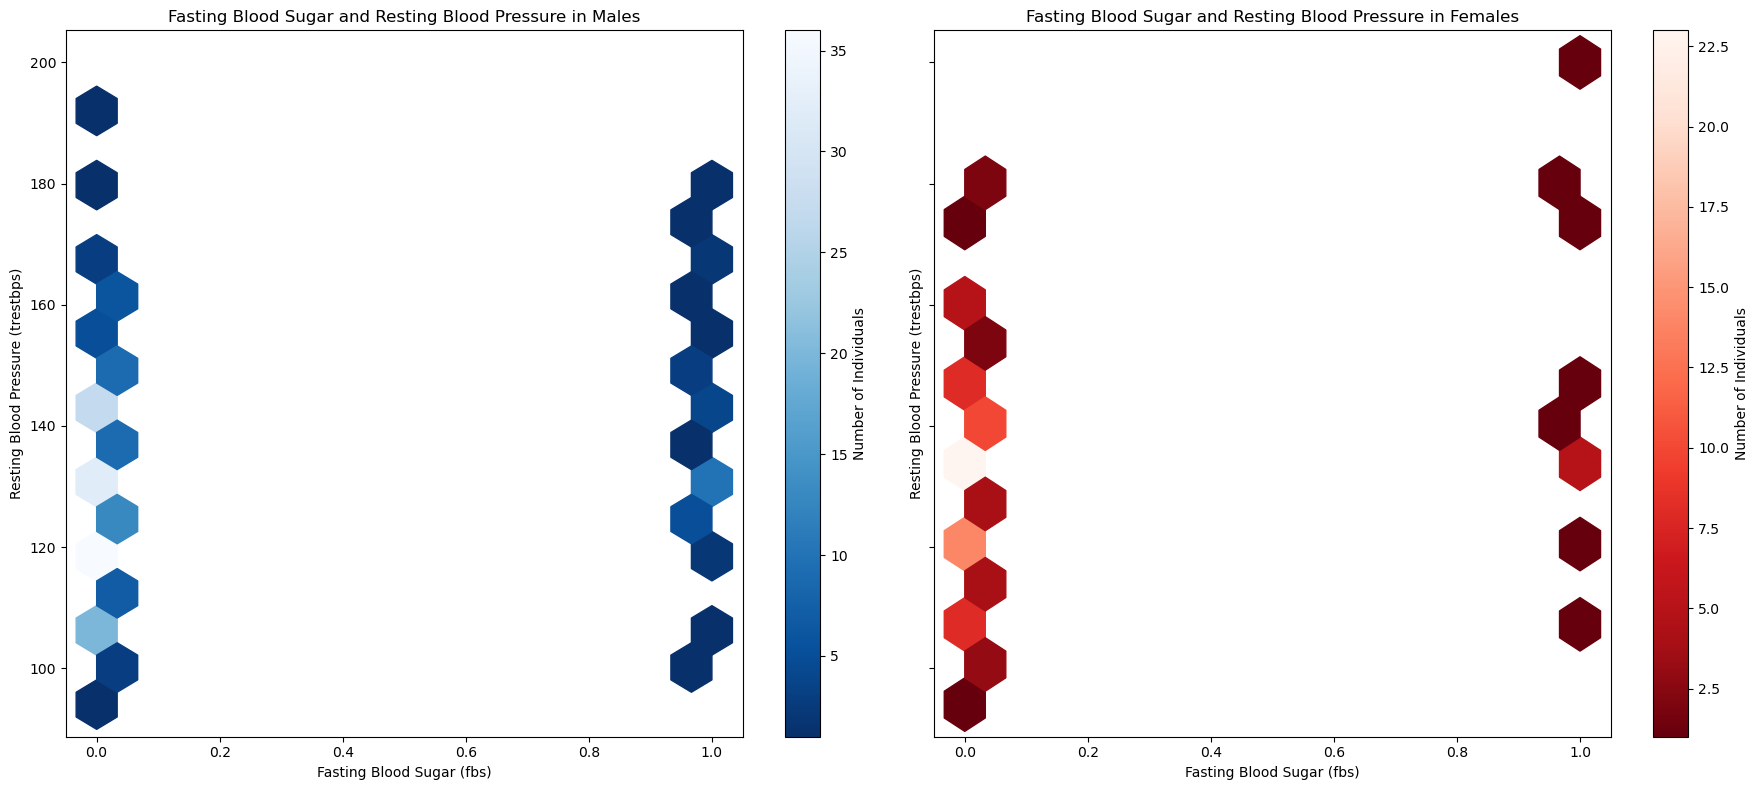

In [134]:
import matplotlib.pyplot as plt

male_data = df[df['sex'] == 1] 
female_data = df[df['sex'] == 0] 

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)

hb = axes[0].hexbin(male_data['fbs'], male_data['trestbps'], gridsize=15, cmap='Blues_r', mincnt=1)
axes[0].set_title('Fasting Blood Sugar and Resting Blood Pressure in Males')
axes[0].set_xlabel('Fasting Blood Sugar (fbs)')
axes[0].set_ylabel('Resting Blood Pressure (trestbps)')
fig.colorbar(hb, ax=axes[0], label='Number of Individuals')

hb = axes[1].hexbin(female_data['fbs'], female_data['trestbps'], gridsize=15, cmap='Reds_r', mincnt=1)
axes[1].set_title('Fasting Blood Sugar and Resting Blood Pressure in Females')
axes[1].set_xlabel('Fasting Blood Sugar (fbs)')
axes[1].set_ylabel('Resting Blood Pressure (trestbps)')
fig.colorbar(hb, ax=axes[1], label='Number of Individuals')

plt.tight_layout()
plt.show()

Fasting blood sugar levels above 120 mg/dl and blood pressure vary by gender. It has been observed that women have higher blood pressure results, while men with fasting blood sugar values ​​below 120 mg/dl may have higher blood pressure.

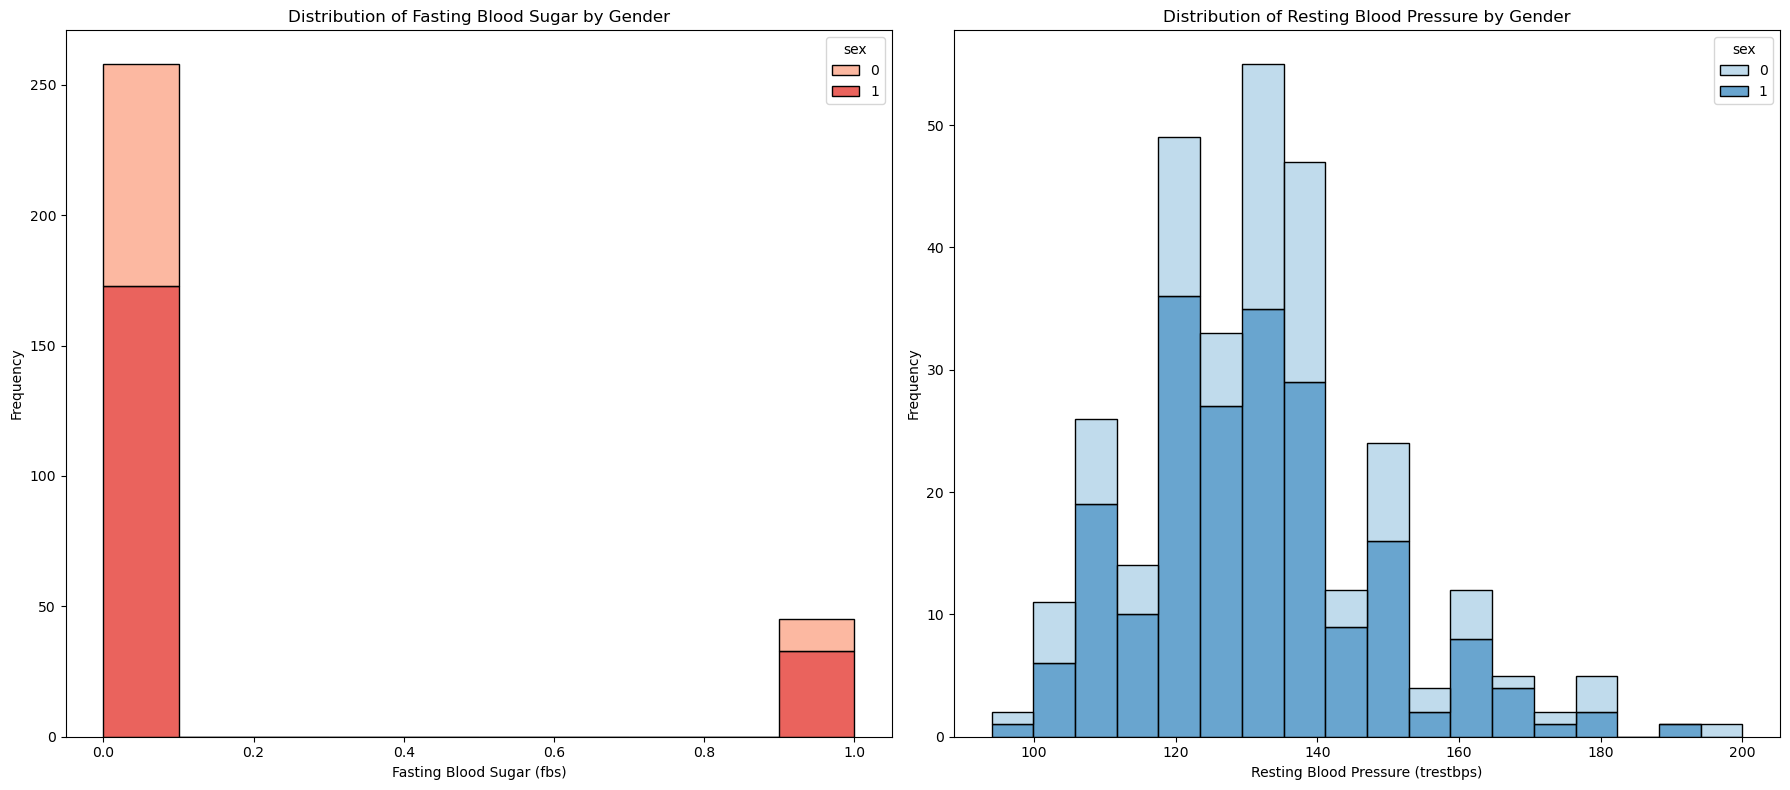

In [143]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.histplot(data=df, x='fbs', hue='sex', multiple='stack', palette='Reds', ax=axes[0])
axes[0].set_title('Distribution of Fasting Blood Sugar by Gender')
axes[0].set_xlabel('Fasting Blood Sugar (fbs)')
axes[0].set_ylabel('Frequency')

sns.histplot(data=df, x='trestbps', hue='sex', multiple='stack', palette='Blues', ax=axes[1])
axes[1].set_title('Distribution of Resting Blood Pressure by Gender')
axes[1].set_xlabel('Resting Blood Pressure (trestbps)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### 4.1.7 -Relationship between ca(Number of Vessels) and cp(chest pain - type of chest pain):

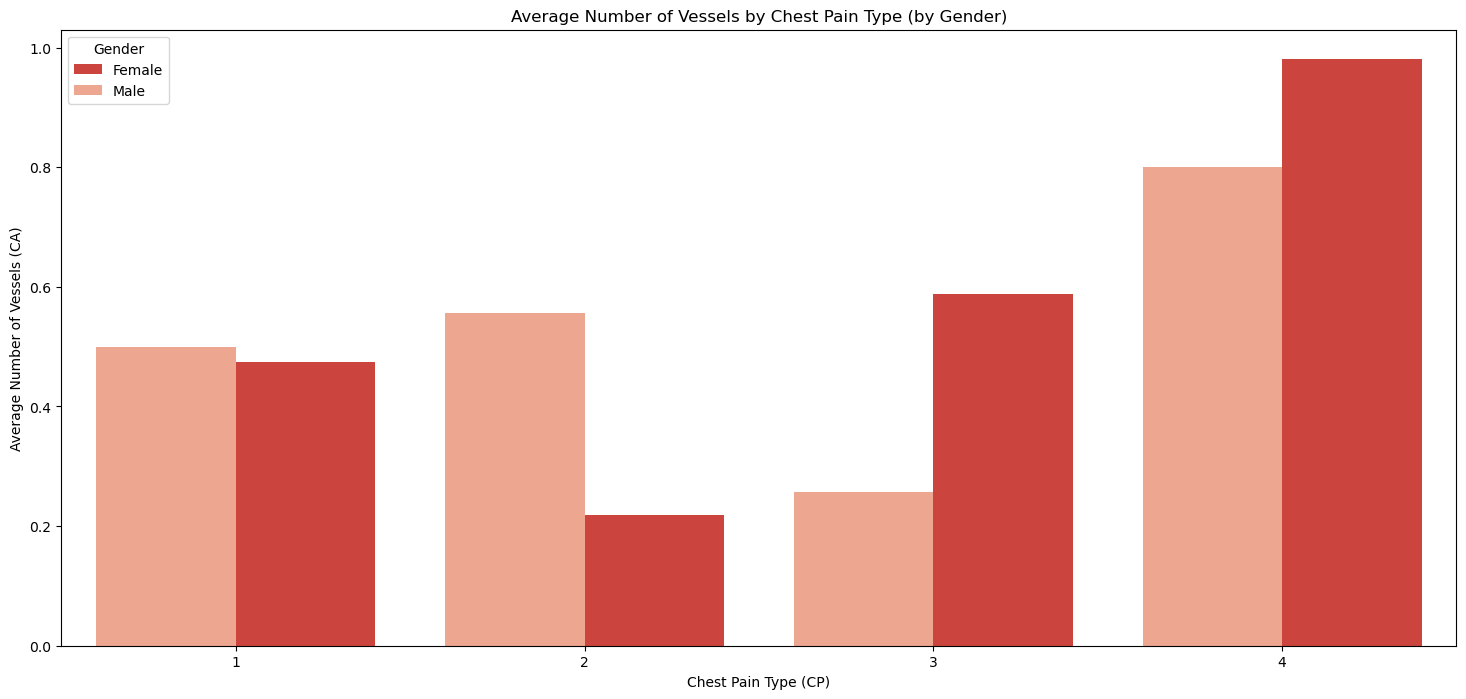

In [148]:
mean_values = df.groupby(['cp', 'sex'])['ca'].mean().reset_index()

plt.figure(figsize=(18, 8))
barplot = sns.barplot(data=mean_values, x='cp', y='ca', hue='sex', palette='Reds')

handles, labels = barplot.get_legend_handles_labels()
barplot.legend(handles=[handles[1], handles[0]], labels=['Female', 'Male'], title='Gender')

plt.title('Average Number of Vessels by Chest Pain Type (by Gender)')
plt.xlabel('Chest Pain Type (CP)')
plt.ylabel('Average Number of Vessels (CA)')
plt.show()

#### 4.2 - Relationship of cholesterol level with heart disease

In [151]:
unique_values = df['chol'].unique()
num_unique_values = len(unique_values)

print(f"There are {num_unique_values} unique values in the cholesterol column.")
print("Unique values:", unique_values)
print(f"This necessitates creating intervals with a categorical assessment.")

There are 152 unique values in the cholesterol column.
Unique values: [233 286 229 250 204 236 268 354 254 203 192 294 256 263 199 168 239 275
 266 211 283 284 224 206 219 340 226 247 167 230 335 234 177 276 353 243
 225 302 212 330 175 417 197 198 290 253 172 273 213 305 216 304 188 282
 185 232 326 231 269 267 248 360 258 308 245 270 208 264 321 274 325 235
 257 164 141 252 255 201 222 260 182 303 265 309 307 249 186 341 183 407
 217 288 220 209 227 261 174 281 221 205 240 289 318 298 564 246 322 299
 300 293 277 214 207 223 160 394 184 315 409 244 195 196 126 313 259 200
 262 215 228 193 271 210 327 149 295 306 178 237 218 242 319 166 180 311
 278 342 169 187 157 176 241 131]
This necessitates creating intervals with a categorical assessment.


Serum cholesterol is generally used to mean total cholesterol. Total cholesterol refers to the sum of all types of cholesterol in your blood and is usually evaluated according to the following reference ranges:

- Normal (Optimal): < 200 mg/dL
- Borderline High: 200-239 mg/dL
- High (High Risk): ≥ 240 mg/dL
- These values ​​are used to assess and manage individuals' risk of heart disease.

In [154]:
def categorize_cholesterol(value):
    if value < 200:
        return 'Normal (Optimal)'
    elif 200 <= value < 240:
        return 'Borderline High'
    else:
        return 'High (High Risk)'

df['chol_category'] = df['chol'].apply(categorize_cholesterol)
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,AgeCategory,age_numeric,trestbps_category,trestbps_category_numeric,chol_category
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,Risky Age for Heart Disease,3,High,4,Borderline High
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1,Risky Age for Heart Disease,3,High,4,High (High Risk)
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,Risky Age for Heart Disease,3,High Normal,3,Borderline High
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,Young Age for Heart Disease,1,High Normal,3,High (High Risk)
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,Young Age for Heart Disease,1,High Normal,3,Borderline High


In [156]:
chol_mapping = {
    'Normal (Optimal)': 0,
    'Borderline High': 1,
    'High (High Risk)': 2
}

df['chol_numeric'] = df['chol_category'].map(chol_mapping)

print(df[['chol_category', 'chol_numeric']].head())

      chol_category  chol_numeric
0   Borderline High             1
1  High (High Risk)             2
2   Borderline High             1
3  High (High Risk)             2
4   Borderline High             1


In [158]:
pivot_table = pd.pivot_table(
    df,
    values='target',
    index=['AgeCategory', 'sex'],
    columns=['chol_category'],
    aggfunc='mean',
    fill_value=0,
    observed=False)

pivot_table

chol_category                        Borderline High  High (High Risk)  \
AgeCategory                     sex                                      
High-Risk Age for Heart Disease 0           0.000000          0.000000   
                                1           0.000000          1.000000   
Normal Age for Heart Disease    0           0.272727          0.281250   
                                1           0.511111          0.655172   
Risky Age for Heart Disease     0           0.285714          0.363636   
                                1           0.533333          0.791667   
Young Age for Heart Disease     0           0.000000          0.200000   
                                1           0.214286          0.285714   

chol_category                        Normal (Optimal)  
AgeCategory                     sex                    
High-Risk Age for Heart Disease 0            0.000000  
                                1            0.000000  
Normal Age for Heart Disease    0            0.000000  
                                1            0.444444  
Risky Age for Heart Disease     0            0.500000  
                                1            0.800000  
Young Age for Heart Disease     0            0.000000  
                                1            0.500000

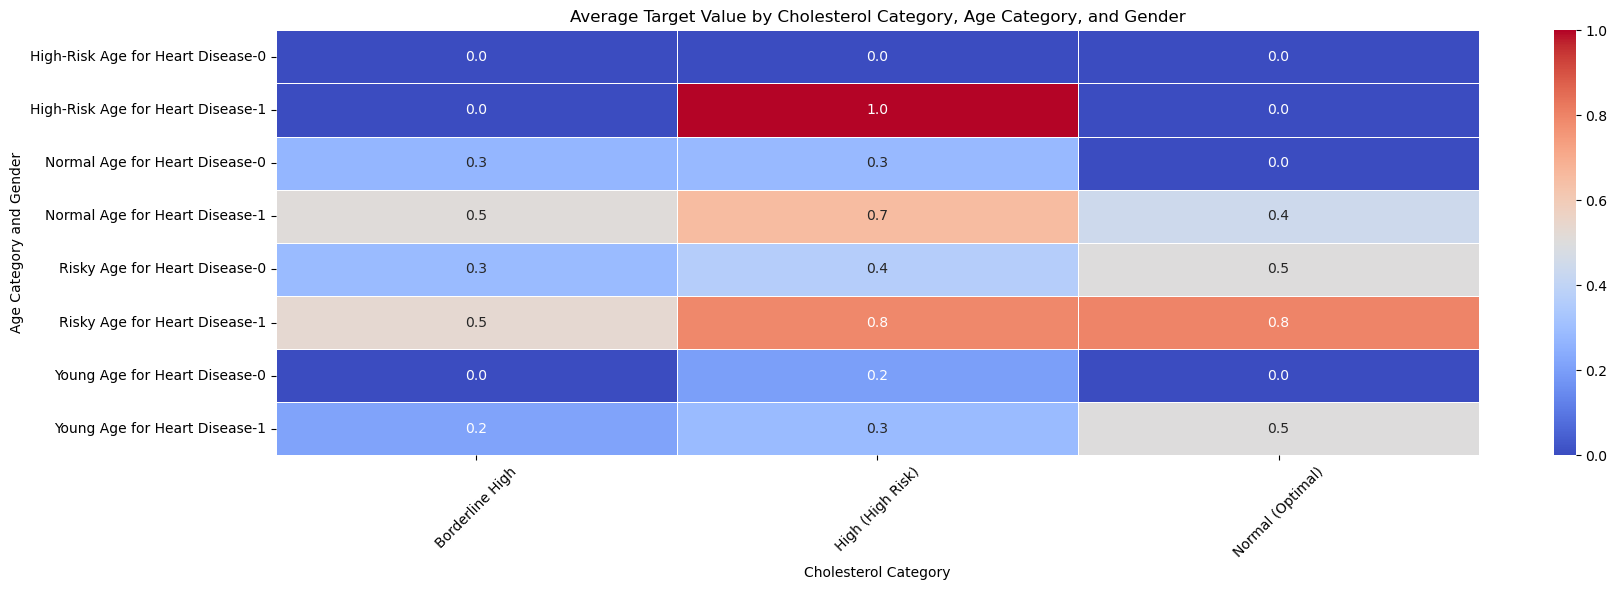

In [160]:
plt.figure(figsize=(18, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)

plt.title('Average Target Value by Cholesterol Category, Age Category, and Gender')
plt.xlabel('Cholesterol Category')
plt.ylabel('Age Category and Gender')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

High cholesterol in men appears to be directly linked to heart disease.

#### 4.3 - Relationship of Maximum Heart Rate to Heart Disease


Different formulas can be used for women and men:
1. For men:
Maximum Heart Rate=220−Age
2. For women:
Some studies suggest that a more gentle formula for women might be:
Maximum Heart Rate=206−(0.88×Age)

In [165]:
def calculate_max_thalach(row):
    if row['sex'] == 1: 
        return 220 - row['age']
    else:  
        return 206 - (0.88 * row['age'])

df['max_thalach'] = df.apply(calculate_max_thalach, axis=1)

df['thalach_diff'] = df['thalach'] - df['max_thalach']

def categorize_thalach(row):
    if row['thalach_diff'] <= -30:
        return 'Very Low'
    elif -30 < row['thalach_diff'] <= -15:
        return 'Low'
    elif -15 < row['thalach_diff'] <= 10:
        return 'Normal'
    elif 10 < row['thalach_diff'] <= 30:
        return 'High'
    else:
        return 'Very High'

df['thalach_category'] = df.apply(categorize_thalach, axis=1)

In [167]:
thalach_mapping = {
    'Very Low': 1,
    'Low': 2,
    'Normal': 3,
    'High': 4,
    'Very High': 5
}

df['thalach_numeric'] = df['thalach_category'].map(thalach_mapping)

In [169]:
pivot_table_2 = df[['age', 'sex', 'thalach', 'max_thalach', 'thalach_diff', 'thalach_category']]

In [173]:
pivot_table_2.head(5)

,age,sex,thalach,max_thalach,thalach_diff,thalach_category
0,63,1,150,157.00,-7.00,Normal
1,67,1,108,153.00,-45.00,Very Low
2,67,1,129,153.00,-24.00,Low
3,37,1,187,183.00,4.00,Normal
4,41,0,172,169.92,2.08,Normal


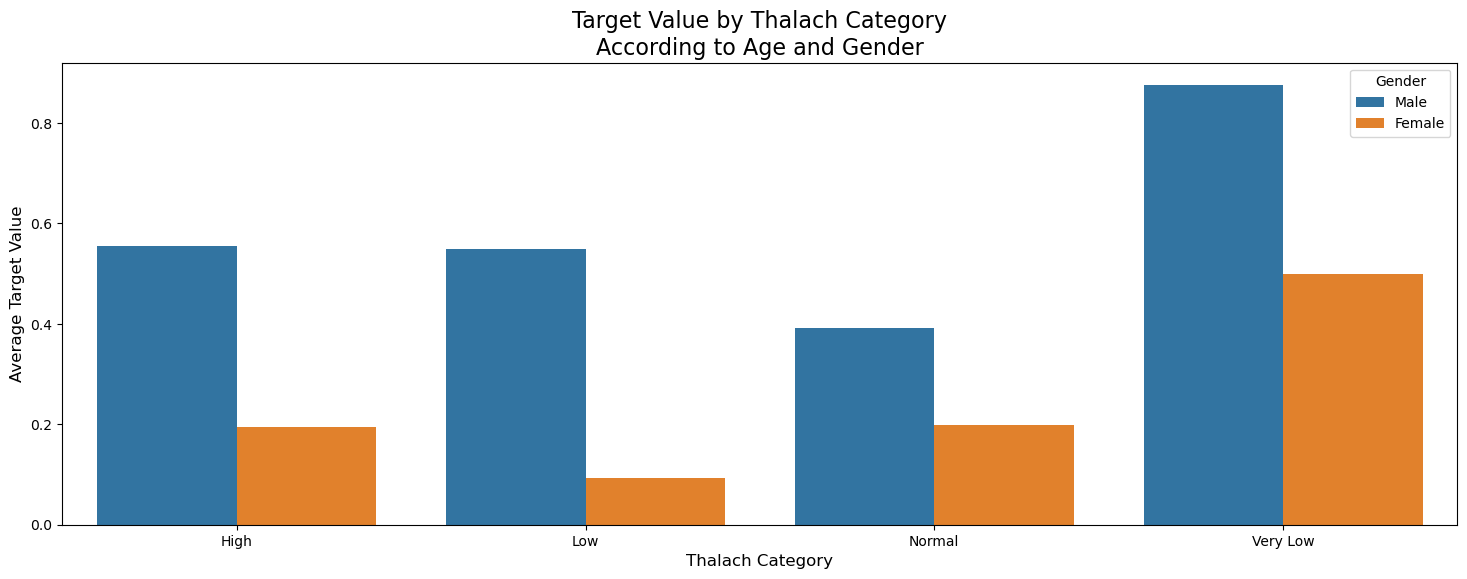

In [175]:
barplot_data = df.groupby(['thalach_category', 'AgeCategory', 'sex'], observed=False)['target'].mean().reset_index()

barplot_data['sex_label'] = barplot_data['sex'].map({0: 'Female', 1: 'Male'})

plt.figure(figsize=(18, 6))
sns.barplot(data=barplot_data, x='thalach_category', y='target', hue='sex_label', errorbar=None)

plt.title('Target Value by Thalach Category\nAccording to Age and Gender', fontsize=16)
plt.xlabel('Thalach Category', fontsize=12)
plt.ylabel('Average Target Value', fontsize=12)
plt.legend(title='Gender', loc='upper right')

plt.show()


***Low heart rate increases the risk of heart disease in men.**

## 5- Feature Engineering

Let's follow these steps to finalize our data frame (DataFrame) for analysis:

- Encoding Categorical Variables: Let's convert the categorical variables we will use into numerical values ​​and make them suitable for machine learning models.
- Removing Unnecessary Features: Let's simplify the data set by removing columns that we will not use in our analysis or that will not contribute to the model.

After these two steps, our data set will become cleaner, more understandable and more suitable for machine learning algorithms.

Features we will use:
- AgeCategory - Categorical variable
- Sex - Binary variable
- cp (chest pain type) - Numeric variable 
- trestbps_category - Categorical variable
- chol_category - Categorical variable
- fbs - Binary variable
- restecg - Numeric variable
- thalach_category - Categorical variable
- exang - Binary variable 
- oldpeak_category - Categorical variable
- slope - Numeric variable
- ca - Numeric variable 
- target - Target variable

In [181]:
df['oldpeak_category'] = pd.cut(df['oldpeak'], 
                                bins=[-1, 0, 2, 4, 7], 
                                labels=['Normal', 'Mild', 'Moderate', 'Severe'])

In [183]:
oldpeak_mapping = {
    'Normal': 0,
    'Mild': 1,
    'Moderate': 2,
    'Severe': 3
}

df['oldpeak_numeric'] = df['oldpeak_category'].map(oldpeak_mapping)

In [185]:
df['ca'] = df['ca'].astype(int)
df['thal'] = df['thal'].astype(int)

In [187]:
df_ml= df[['age_numeric', 'sex', 'cp', 'trestbps_category_numeric', 'chol_numeric', 'fbs', 'restecg', 
                  'thalach_numeric', 'exang', 'oldpeak_numeric', 'slope', 'ca', 'target']]
df_ml.head()

,age_numeric,sex,cp,trestbps_category_numeric,chol_numeric,fbs,restecg,thalach_numeric,exang,oldpeak_numeric,slope,ca,target
0,3,1,1,4,1,1,2,3,0,2,3,0,0
1,3,1,4,4,2,0,2,1,1,1,2,3,1
2,3,1,4,3,1,0,2,2,1,2,2,2,1
3,1,1,3,3,2,0,0,3,0,2,3,0,0
4,1,0,2,3,1,0,2,3,0,1,1,0,0


In [189]:
print(df_ml.isnull().sum())

age_numeric                  0
sex                          0
cp                           0
trestbps_category_numeric    0
chol_numeric                 0
fbs                          0
restecg                      0
thalach_numeric              0
exang                        0
oldpeak_numeric              0
slope                        0
ca                           0
target                       0
dtype: int64


## 6- Feature Selection

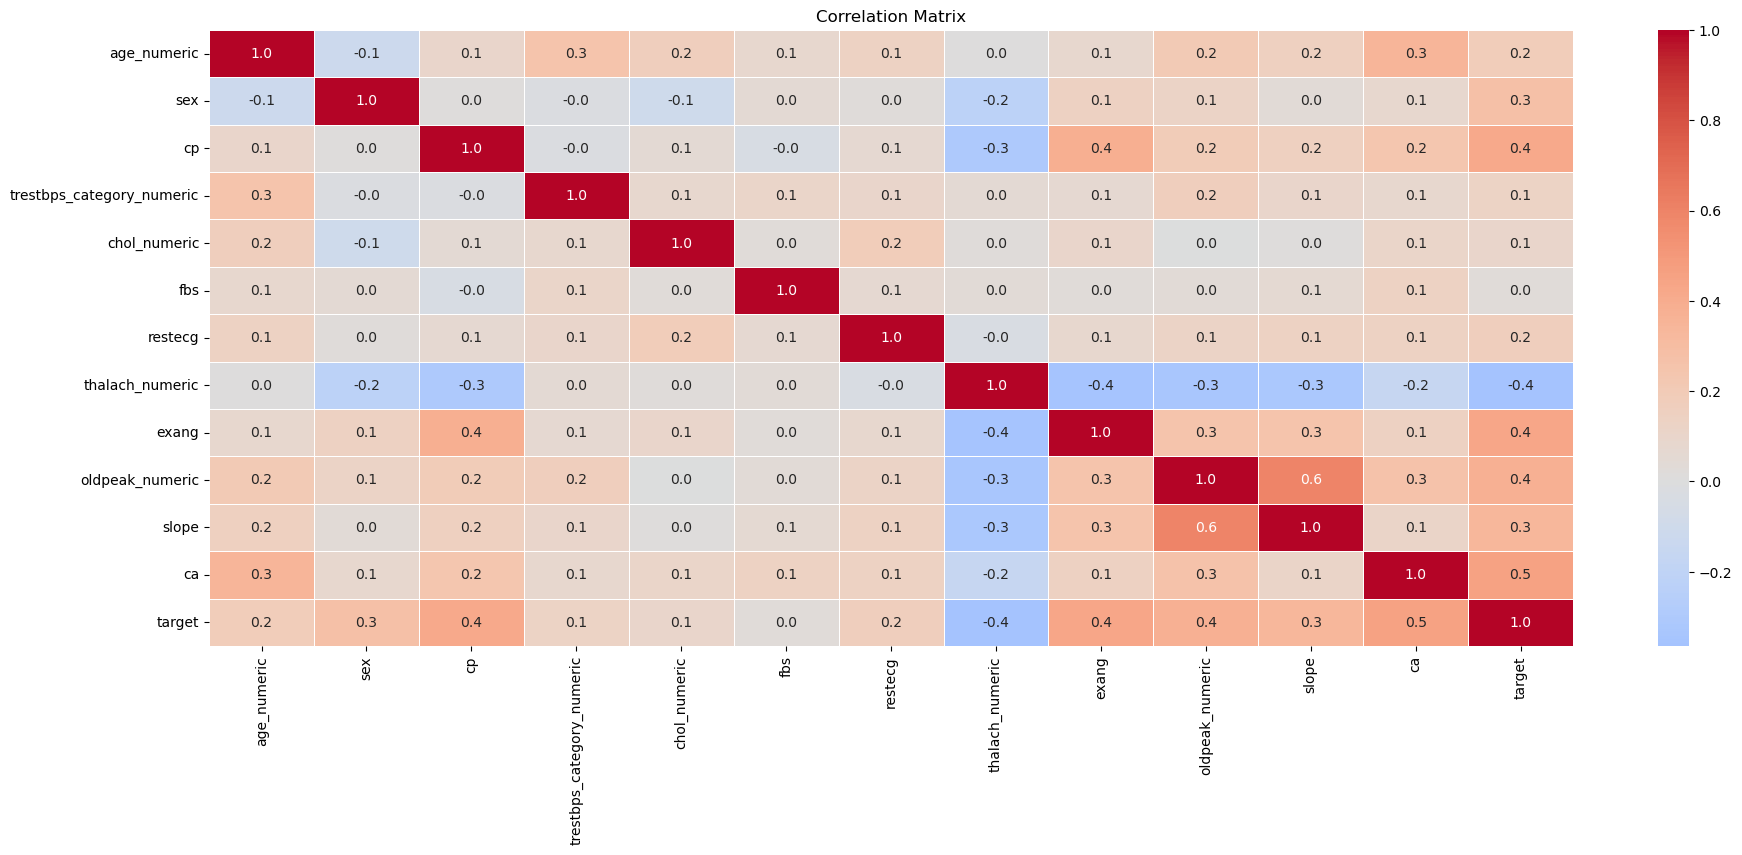

In [192]:
correlation_matrix = df_ml.corr()

plt.figure(figsize=(22, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5, center=0)
plt.title('Correlation Matrix')
plt.show()

In [194]:
target_correlation = correlation_matrix['target'].drop('target')
sorted_target_correlation = target_correlation.abs().sort_values(ascending=False)

print("Variables with the highest correlation with target:")
sorted_target_correlation.head(10)

Variables with the highest correlation with target:


ca                           0.460033
exang                        0.431894
cp                           0.414446
oldpeak_numeric              0.378213
thalach_numeric              0.364226
slope                        0.339213
sex                          0.276816
age_numeric                  0.187338
restecg                      0.169202
trestbps_category_numeric    0.126363
Name: target, dtype: float64

#### 6.1.1 - Logistic Regression Machine Learning Model Coefficiencies

In [357]:
coefficients = log_reg.coef_[0]
feature_names = X.columns

for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

age_numeric: 0.6755333786118282
sex: 1.4436890860352793
cp: 1.1270269150994148
trestbps_category_numeric: 0.3940900530239022
chol_numeric: 0.46510363541896316
fbs: -0.003898416811354663
restecg: 0.3154073454378802
thalach_numeric: -0.5328011506411678
exang: 1.1640857048299011
oldpeak_numeric: 0.608601085661251
slope: 0.8897420849738539
ca: 2.909701279026206


These values ​​appear to be standardized (normalized) or z-score values ​​obtained from training a model or analysis. It may be used to measure the contribution or impact of each feature. Values ​​indicate how much different features deviate from the mean.

- sex: 1.44

***The gender variable has a very high positive effect. This shows that gender is an important factor in the model and its effect is above average.***

- cp (chest pain): 1.12

***The type of chest pain also seems to play an important role in the model. A value of 1.12 indicates a positive and relatively strong contribution.***

- thalach_numeric: -0.5

***Maximum heart rate (thalach) is below average and has a negative effect. This indicates that those with lower heart rates negatively impact the model.***

- exang: 1.16

***Post-exercise angina (exang) has a strong positive effect. This suggests that those experiencing post-exercise angina are a more significant factor in the model.***

- ca: 2.9

***Calcium deposition (ca) in the coronary arteries is the variable with the highest impact. This can be interpreted as one of the most important factors in the model. The positive effect of calcium accumulation suggests that it has a strong effect on predicting the risk of heart disease.***

#### 6.2.1 - RandomForestClassifier Machine Learning Model - RobustScaler

In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X = df_ml.drop(columns=['target'])
y = df_ml['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model_temp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_temp.fit(X_train, y_train)

importances = rf_model_temp.feature_importances_
feature_names = X.columns
feature_importances = dict(zip(feature_names, importances))

sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

top_6_features = [feature for feature, importance in sorted_features[:6]]
print("Top 6 features:", top_6_features)

X_top_6_train = X_train[top_6_features]
X_top_6_test = X_test[top_6_features]

scaler = RobustScaler()
X_top_6_train_scaled = scaler.fit_transform(X_top_6_train)
X_top_6_test_scaled = scaler.transform(X_top_6_test)

rf_model_top_6 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_top_6.fit(X_top_6_train_scaled, y_train)

y_pred_top_6 = rf_model_top_6.predict(X_top_6_test_scaled)

accuracy_rf_top_6 = accuracy_score(y_test, y_pred_top_6)
print("Random Forest Accuracy (Top 6 Features Scaled):", accuracy_rf_top_6)

print("Classification Report (Top 6 Features Scaled):")
print(classification_report(y_test, y_pred_top_6))


Top 6 features: ['cp', 'ca', 'slope', 'oldpeak_numeric', 'thalach_numeric', 'exang']
Random Forest Accuracy (Top 6 Features Scaled): 0.8524590163934426
Classification Report (Top 6 Features Scaled):
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



***Model shows maximum 0.85 accuracy***

#### 6.3.1 - Support Vector Machine Machine Learning Model - MinMaxScaler

In [210]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler

svm_model = SVC(kernel='linear', random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

report_svm = classification_report(y_test, y_pred_svm)
print("SVM Classification Report:")
print(report_svm)

SVM Accuracy: 0.8688524590163934
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



***Model shows maximum 0.87 accuracy***

#### 6.4.1 - Creating a Model Ensemble using RandomForestClassifier and SVC models.

In [219]:
X = df_ml.drop(columns=['target'])
y = df_ml['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_model = SVC(kernel='linear', random_state=42)
scaler_svm = MinMaxScaler()
X_train_scaled_svm = scaler_svm.fit_transform(X_train)
X_test_scaled_svm = scaler_svm.transform(X_test)
svm_model.fit(X_train_scaled_svm, y_train)

rf_model_temp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_temp.fit(X_train, y_train)

importances = rf_model_temp.feature_importances_
feature_names = X.columns
feature_importances = dict(zip(feature_names, importances))

sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
top_6_features = [feature for feature, importance in sorted_features[:6]]
print("Top 6 Features:", top_6_features)

X_top_6_train = X_train[top_6_features]
X_top_6_test = X_test[top_6_features]
scaler_rf = RobustScaler()
X_top_6_train_scaled = scaler_rf.fit_transform(X_top_6_train)
X_top_6_test_scaled = scaler_rf.transform(X_top_6_test)

rf_model_top_6 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_top_6.fit(X_top_6_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled_svm)
y_pred_rf = rf_model_top_6.predict(X_top_6_test_scaled)

y_pred_ensemble = np.round((y_pred_svm + y_pred_rf) / 2).astype(int)  # Simple averaging

accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Accuracy: {accuracy_ensemble}")

report_ensemble = classification_report(y_test, y_pred_ensemble)
print("Ensemble Classification Report:")
print(report_ensemble)

Top 6 Features: ['cp', 'ca', 'slope', 'oldpeak_numeric', 'thalach_numeric', 'exang']
Ensemble Accuracy: 0.8688524590163934
Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        29
           1       0.96      0.78      0.86        32

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



#### 6.4.2 - Improving model performance with Hyperparameter Tuning

In [222]:
from sklearn.model_selection import GridSearchCV

param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf'] 
}

grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train_scaled_svm, y_train)

print("Best Parameters (SVM):", grid_search_svm.best_params_)
print("Best Score (SVM):", grid_search_svm.best_score_)

best_svm_model = grid_search_svm.best_estimator_
y_pred_svm_best = best_svm_model.predict(X_test_scaled_svm)

accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)
print(f"SVM Accuracy (With Best Parameters): {accuracy_svm_best}")

report_svm_best = classification_report(y_test, y_pred_svm_best)
print("SVM Classification Report (With Best Parameters):")
print(report_svm_best)

Best Parameters (SVM): {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Score (SVM): 0.805952380952381
SVM Accuracy (With Best Parameters): 0.8524590163934426
SVM Classification Report (With Best Parameters):
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.90      0.81      0.85        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [224]:
best_rf_model = RandomForestClassifier(
    max_depth=None,
    max_features='log2',
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

best_rf_model.fit(X_train, y_train)

y_pred = best_rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy Score: {accuracy}")

Model Accuracy Score: 0.8524590163934426


Let's apply the parameters to our Model.

#### 6.4.3 - Creating a StackingClassifier model using RandomForestClassifier and SVC models - hyperparamater tuning

In [230]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

base_models = [
    ('rf', best_rf_model),
    ('svm', best_svm_model)
]

meta_model = LogisticRegression()

stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

stacking_clf.fit(X_train, y_train)

y_pred_stacking = stacking_clf.predict(X_test)

accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Model Accuracy Score: {accuracy_stacking}")

Stacking Model Accuracy Score: 0.8688524590163934


In [232]:
from sklearn.metrics import classification_report

y_pred_stacking = stacking_clf.predict(X_test)

report_stacking = classification_report(y_test, y_pred_stacking)

print("Stacking Model Classification Report:")
print(report_stacking)

Stacking Model Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



#### Our model predicts non-patients (class 0) very well and has a very high sensitivity (recall) rate. However, it has a slightly lower sensitivity in predicting those who are sick (class 1). This means the model detects those who are sick slightly less successfully.

#### 6.4.3.1 - Adjusting the Class Weights of Our Model - Class Weight Method

***Adjusting Class Weights:*** You can adjust the class_weight parameter of the model to emphasize class 1 more, allowing the model to better predict those who are sick.

In [241]:
class_weights = 'balanced'

meta_model = LogisticRegression(class_weight=class_weights, max_iter=1000)

stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)

stacking_clf.fit(X_train, y_train)

y_pred_stacking = stacking_clf.predict(X_test)

accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f"Stacking Model Accuracy Score: {accuracy_stacking}")

Stacking Model Accuracy Score: 0.8852459016393442


In [243]:
from sklearn.metrics import classification_report

report_stacking = classification_report(y_test, y_pred_stacking)
print("Stacking Model Classification Report:")
print(report_stacking)

Stacking Model Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



#### The performance of our model reaches up to 0.89, giving the impression of a successful and balanced model.

## 7- Results

***"An ensemble classification model, created by combining the best-performing Random Forest and SVM models, strengthened by the stacking method, and containing the balanced Logistic Regression meta model to take into account class imbalance, was selected.***

# Model Summary

## Ensemble Approach

### Combination of Random Forest and SVM
This model combines two powerful and different classifiers: Random Forest and SVM. Random Forest consists of a combination of many decision trees and enhances generalization power in high-dimensional data. SVM, on the other hand, has a strong ability to differentiate between classes. Combining these two models brings together different classification capabilities and improves overall performance.

## Stacking Method

### Logistic Regression as the Meta Model
The stacking method provides stronger and more generalizable predictions by combining the predictions of the base models (Random Forest and SVM). The Logistic Regression model used as the meta model takes these predictions and optimizes the results. The `class_weight='balanced'` parameter ensures that the minority class is adequately represented, addressing class imbalance issues.

## Performance Evaluation

### Accuracy
The overall accuracy score of the model is 89%. This indicates that the model correctly predicts 89% of the test data. High accuracy suggests that the model performs well overall.

### Precision and Recall

- **Precision**: The precision value for class 1 is 0.90. This means that 90% of the model's positive predictions are truly correct. In other words, the model predicts the positive class with high accuracy.
  
- **Recall**: The recall value for class 1 is 0.88. This indicates that the model correctly predicts 88% of the actual positive examples. Most of the actual positive class is correctly identified.

- **F1-Score**: The F1-score is a balanced measure of precision and recall. The F1-score for class 1 is 0.89, indicating that the model performs well in terms of both precision and recall.

### Macro and Weighted Average
Macro average takes the average of metrics for each class, while weighted average calculates a weighted average based on class support. These values reflect the overall success of the model and the balance between classes.

## Why Choose This Model?

- **High Performance**: The model demonstrates good performance with high accuracy and balanced precision, recall, and F1-score values.
  
- **Balanced Predictions**: The use of a balanced Logistic Regression meta model ensures that the minority class is adequately represented, reducing the negative effects of class imbalance.
  
- **Ensemble Strength**: The combination of Random Forest and SVM enhances the model's resilience to different data patterns and improves overall predictive power.

In conclusion, this model offers balanced and high-performance predictions by bringing together various classification capabilities. Its design to address issues such as class imbalance helps ensure more reliabl results in practical applications.
r sonuçlar vermesine yardımcı olur.


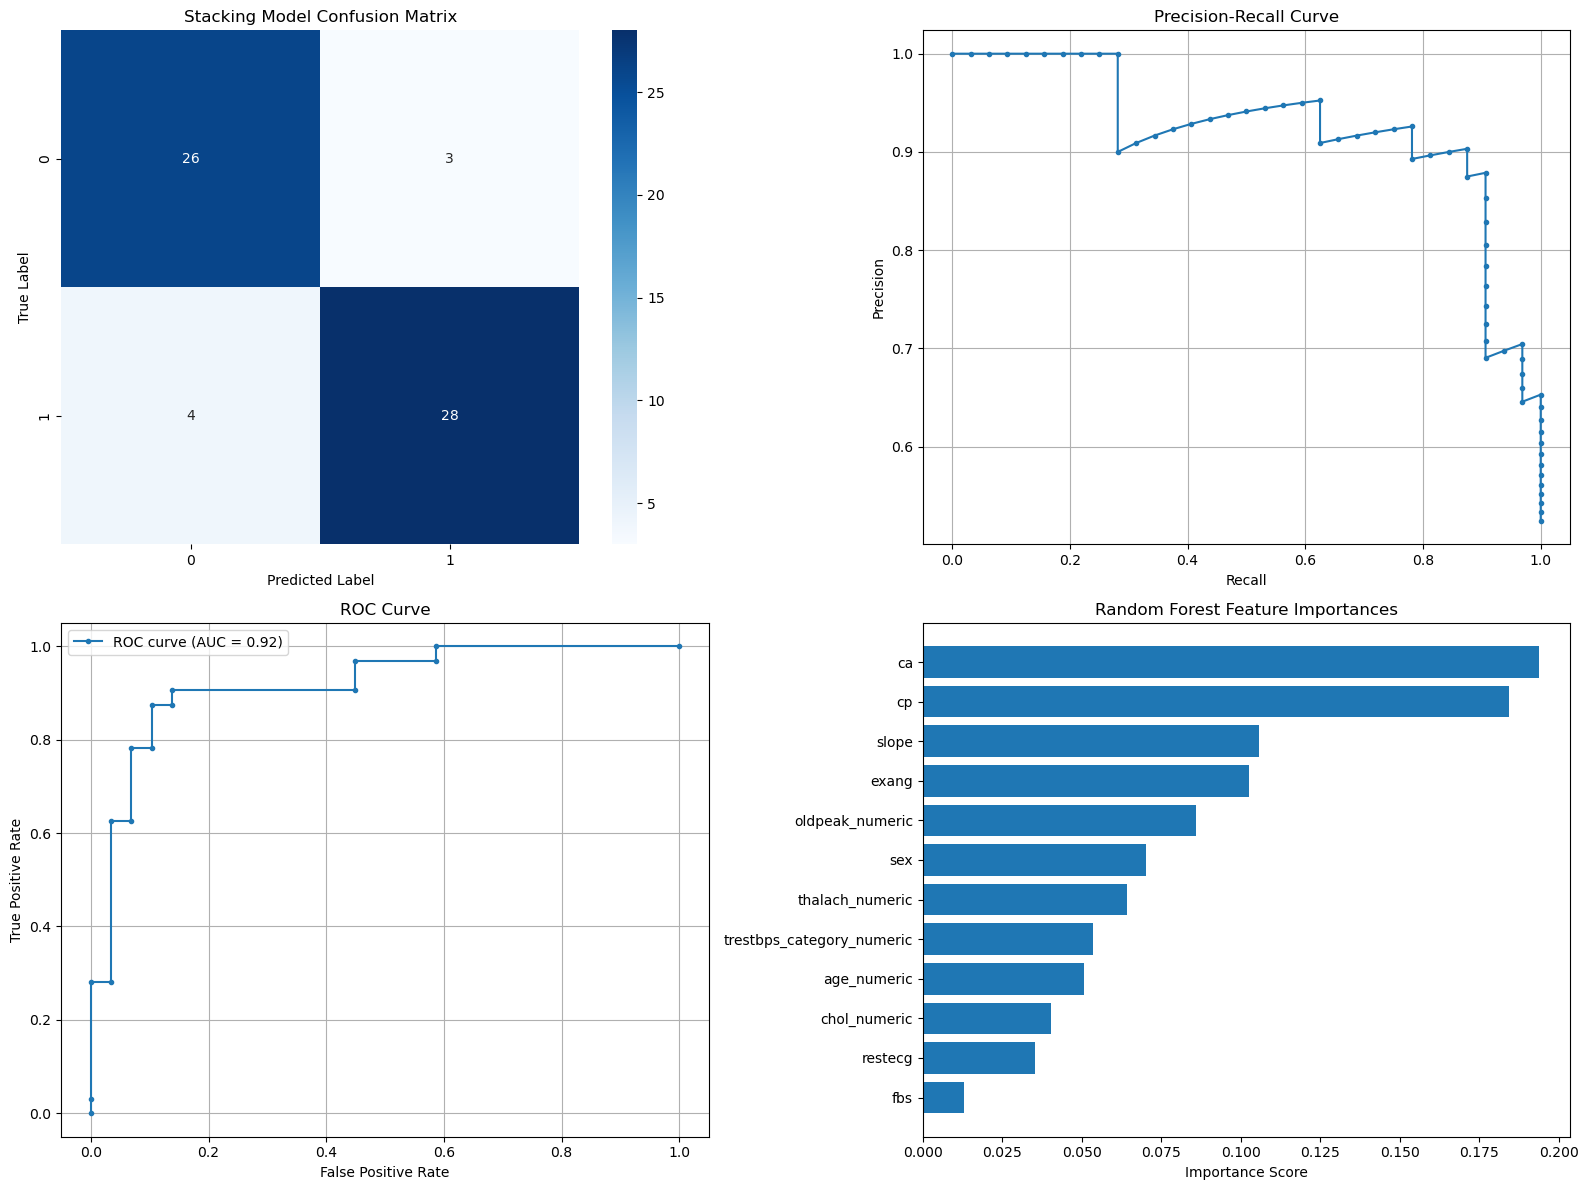

In [249]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, roc_auc_score

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

cm = confusion_matrix(y_test, y_pred_stacking)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[0, 0], 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
axs[0, 0].set_xlabel('Predicted Label')
axs[0, 0].set_ylabel('True Label')
axs[0, 0].set_title('Stacking Model Confusion Matrix')

precision, recall, _ = precision_recall_curve(y_test, stacking_clf.predict_proba(X_test)[:, 1])
axs[0, 1].plot(recall, precision, marker='.')
axs[0, 1].set_xlabel('Recall')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_title('Precision-Recall Curve')
axs[0, 1].grid()

fpr, tpr, _ = roc_curve(y_test, stacking_clf.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, stacking_clf.predict_proba(X_test)[:, 1])
axs[1, 0].plot(fpr, tpr, marker='.', label=f'ROC curve (AUC = {roc_auc:.2f})')
axs[1, 0].set_xlabel('False Positive Rate')
axs[1, 0].set_ylabel('True Positive Rate')
axs[1, 0].set_title('ROC Curve')
axs[1, 0].legend()
axs[1, 0].grid()

feature_importances = best_rf_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(feature_importances)
axs[1, 1].barh(range(len(feature_importances)), feature_importances[indices], align='center')
axs[1, 1].set_yticks(range(len(feature_importances)))
axs[1, 1].set_yticklabels(feature_names[indices])
axs[1, 1].set_xlabel('Importance Score')
axs[1, 1].set_title('Random Forest Feature Importances')

plt.tight_layout()
plt.show()

                                                                                                                                        14.09.2024